In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_32_16_8_stride_8_noDO_decode_B1H_Inst_min_max_window_65_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 256, 32)           352       
_________________________________________________________________
dropout (Dropout)            (None, 256, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 8)              648       
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 32, 8)             328       
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 256, 16)           6

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

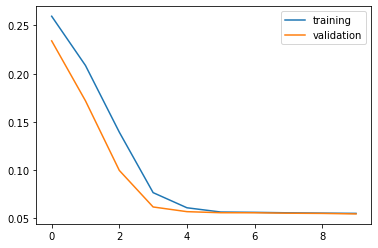

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [2 1 0]
group_bunches: [2974. 2121.  513.]
group_bunches sorted: [ 513. 2121. 2974.]
restore_index: [2 1 0]
group_bunches restored: [2974. 2121.  513.]

50/50 [==============================] - 24s 486ms/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
4845  Inst  6700     1     h  7 2018-05-19 05:47:14   
158   Inst  7031     1     h  7 2018-08-06 17:40:15   
1469  Inst  6245     1     h  7 2017-09-27 01:08:14   
945   Inst  6696     1     h  7 2018-05-18 05:56:14   
3037  Inst  6275     1     h  7 2017-10-05 19:54:51   

                                                   file  n_bunches  \
4845  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6700/...       2556   
158   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7031/...       2556   
1469  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6245/...       1916   
945   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6696/...       2556   
3037  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...       1740   

      bunch_index  bunch_number  ts_length  chunk  
4845        514.0         349.0      65536     18  
158        2478.0        1843.0      65536      0  
1469        835.0         457.0      65536      5  
945         517.0         352.0      65536      3  
3037       2692.0        1440.0      65536     11

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 2s 409ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6636     1     h  7 2018-05-02 11:36:14   
1244  Inst  6243     1     h  7 2017-09-26 07:45:14   
5767  Inst  6807     1     h  7 2018-06-16 03:39:14   
7206  Inst  6624     1     h  7 2018-04-30 00:44:43   
7624  Inst  6636     1     h  7 2018-05-02 11:36:14   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6636/...       1887   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6243/...       1916   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6807/...        300   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6624/...        601   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6636/...       1887   

      bunch_index  bunch_number  ts_length  chunk  
4808       1364.0         813.0      65536     18  
1244        982.0         534.0      65536      4  
5767        444.0         209.0      65536     22  
7206       1447.0         554.0      65536     28  
7624       1364.0         813.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

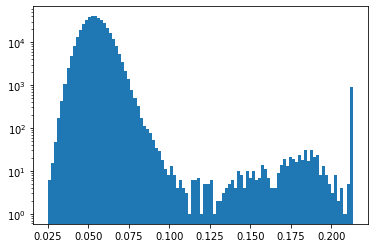

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

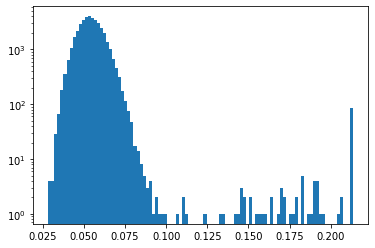

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.04193364396383645
type                                                         Inst
fill                                                         6700
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-19 05:47:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6700/...
n_bunches                                                    2556
bunch_index                                                   514
bunch_number                                                  349
ts_length                                                   65536
chunk                                                          18
Name: 4845, dtype: object


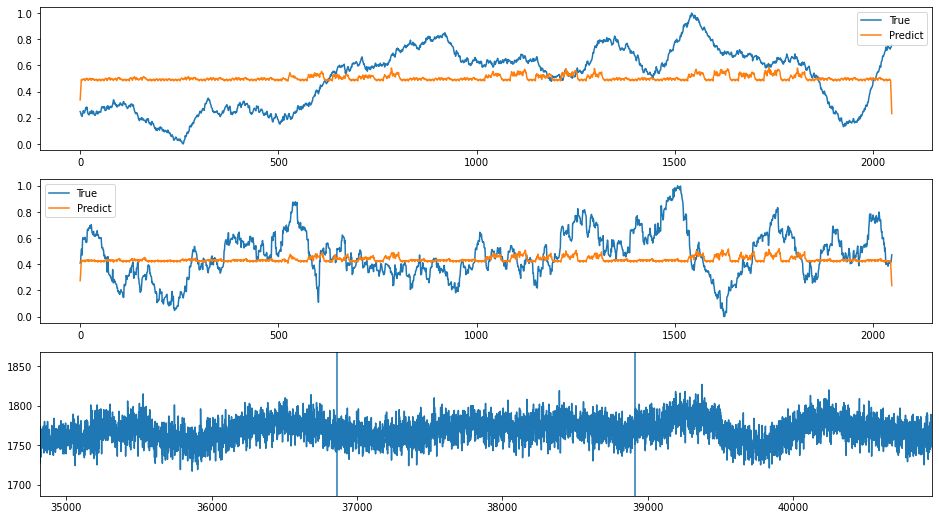

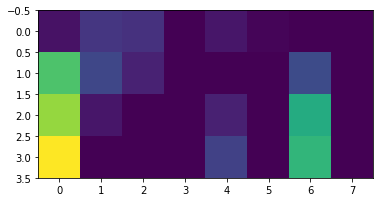

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 65700
Error: 0.025354492403693654
type                                                         Inst
fill                                                         7365
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 23:12:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7365/...
n_bunches                                                     852
bunch_index                                                  1391
bunch_number                                                  708
ts_length                                                   65536
chunk                                                          26
Name: 6791, dtype: object


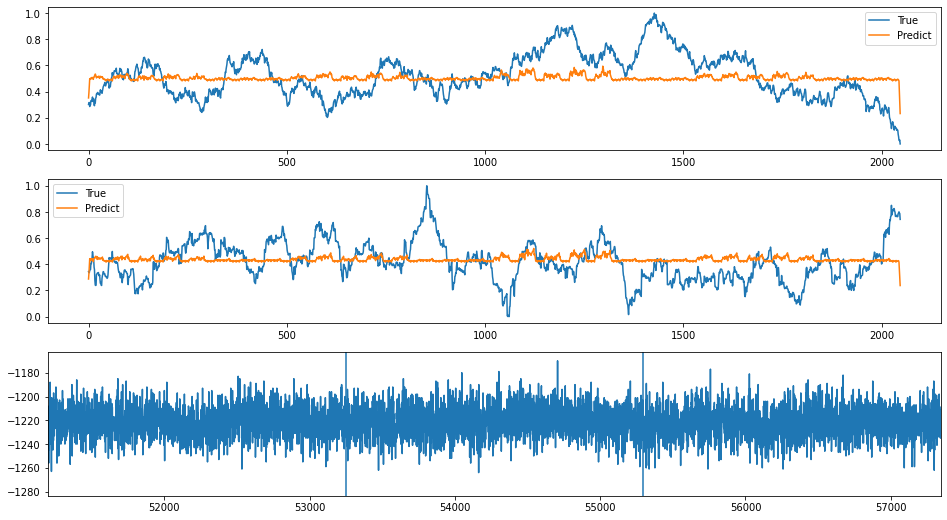

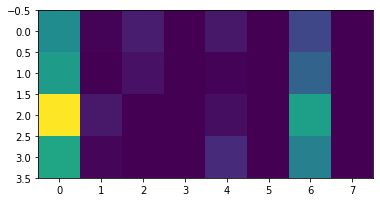

index: 158953
Error: 0.025667418557185972
type                                                         Inst
fill                                                         7446
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-16 02:39:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7446/...
n_bunches                                                     648
bunch_index                                                  1725
bunch_number                                                  320
ts_length                                                   65536
chunk                                                          27
Name: 7019, dtype: object


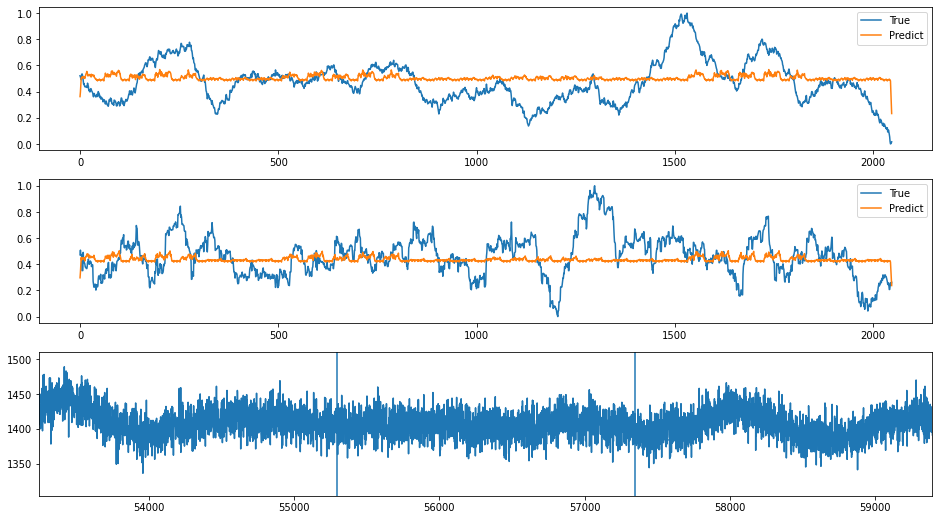

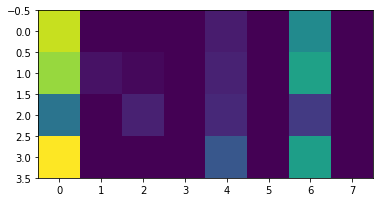

index: 255570
Error: 0.026039713219852725
type                                                         Inst
fill                                                         6693
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 22:54:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6693/...
n_bunches                                                    1887
bunch_index                                                   447
bunch_number                                                  309
ts_length                                                   65536
chunk                                                          23
Name: 5946, dtype: object


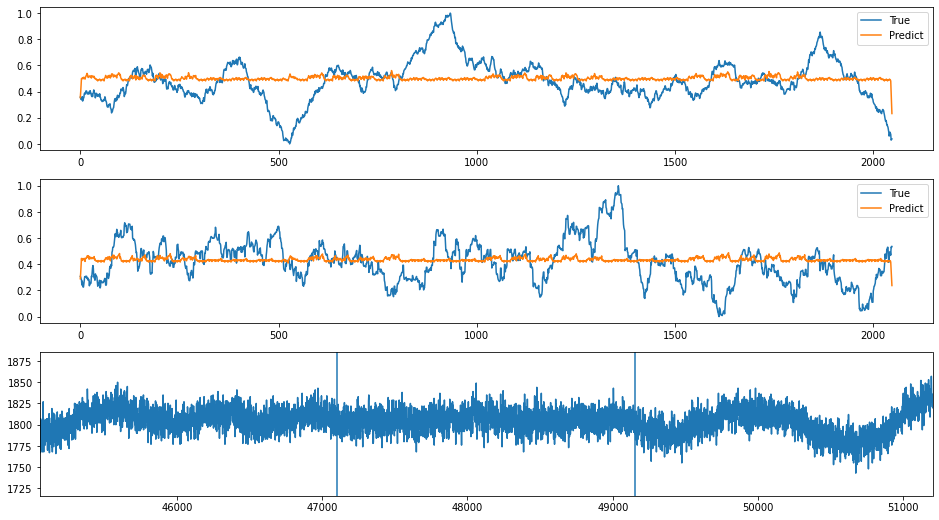

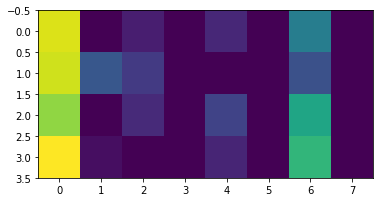

index: 323229
Error: 0.026130725921975663
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:40:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   486
bunch_number                                                  251
ts_length                                                   65536
chunk                                                          11
Name: 2896, dtype: object


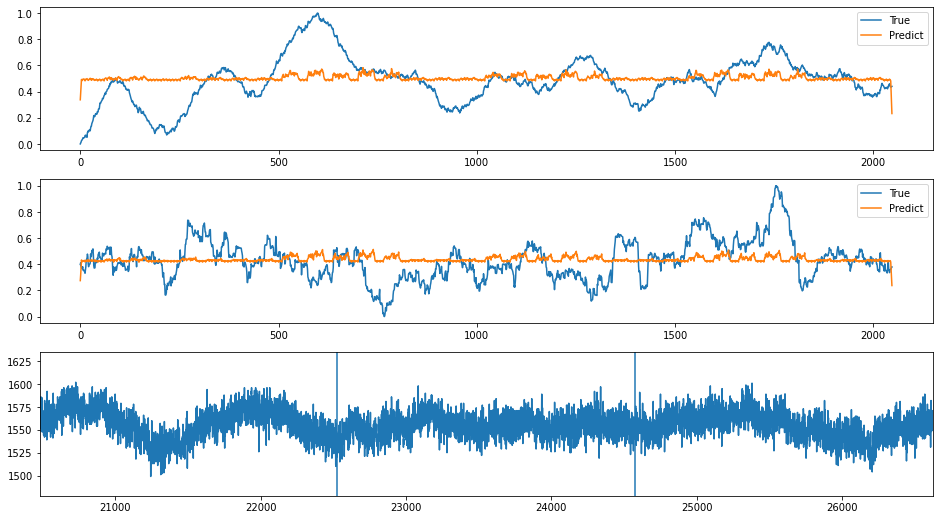

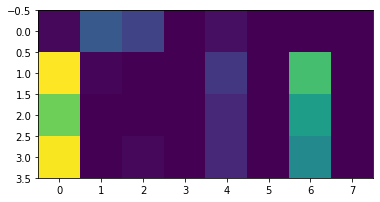

index: 68147
Error: 0.02684203317402195
type                                                         Inst
fill                                                         6239
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-24 06:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6239/...
n_bunches                                                    1358
bunch_index                                                     9
bunch_number                                                    9
ts_length                                                   65536
chunk                                                           2
Name: 521, dtype: object


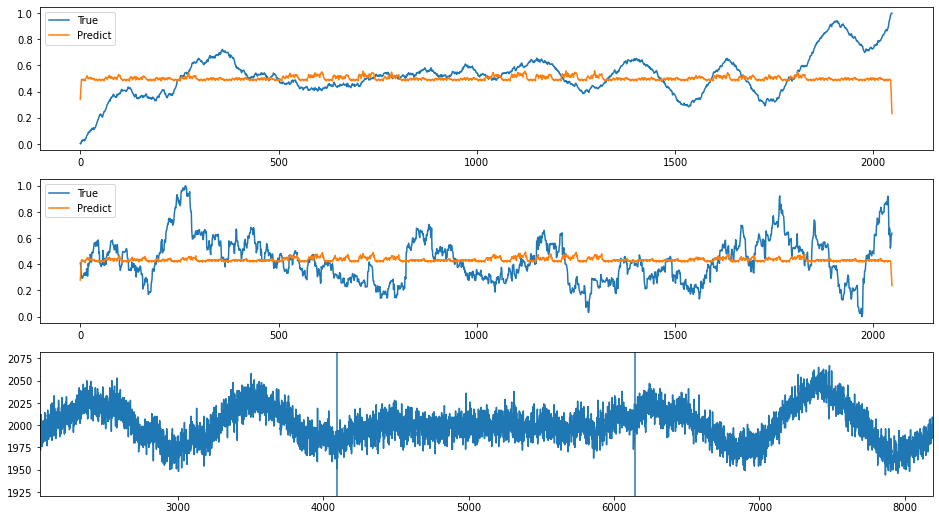

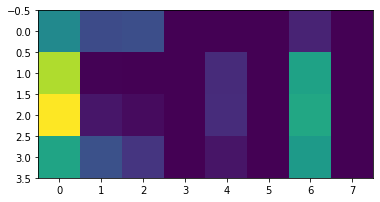

index: 152885
Error: 0.027152808527288314
type                                                         Inst
fill                                                         7174
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-15 09:38:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7174/...
n_bunches                                                     733
bunch_index                                                   398
bunch_number                                                  237
ts_length                                                   65536
chunk                                                          30
Name: 7888, dtype: object


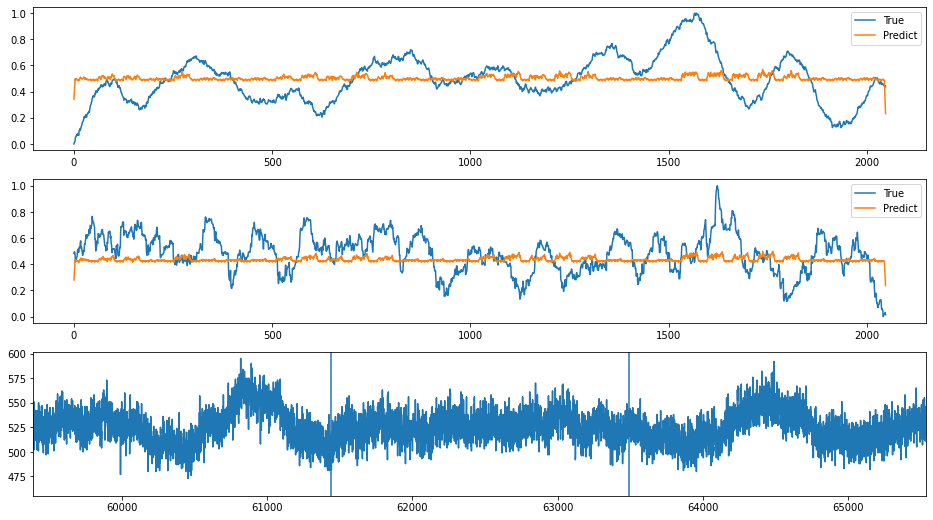

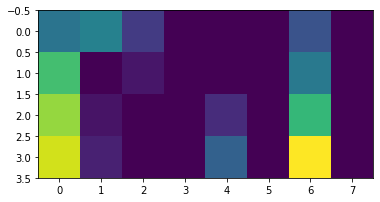

index: 291098
Error: 0.027540116086990255
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-02 02:05:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                    1868
bunch_index                                                  3085
bunch_number                                                 1656
ts_length                                                   65536
chunk                                                           2
Name: 607, dtype: object


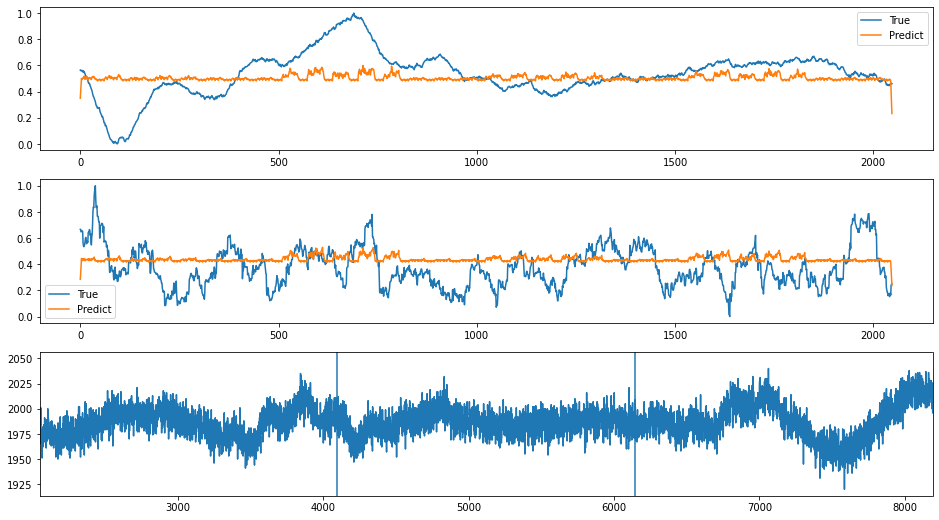

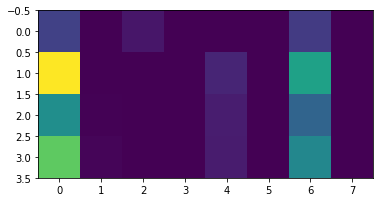

index: 32589
Error: 0.027732375164071753
type                                                         Inst
fill                                                         6343
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 16:30:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6343/...
n_bunches                                                    1868
bunch_index                                                  1591
bunch_number                                                  867
ts_length                                                   65536
chunk                                                          24
Name: 6297, dtype: object


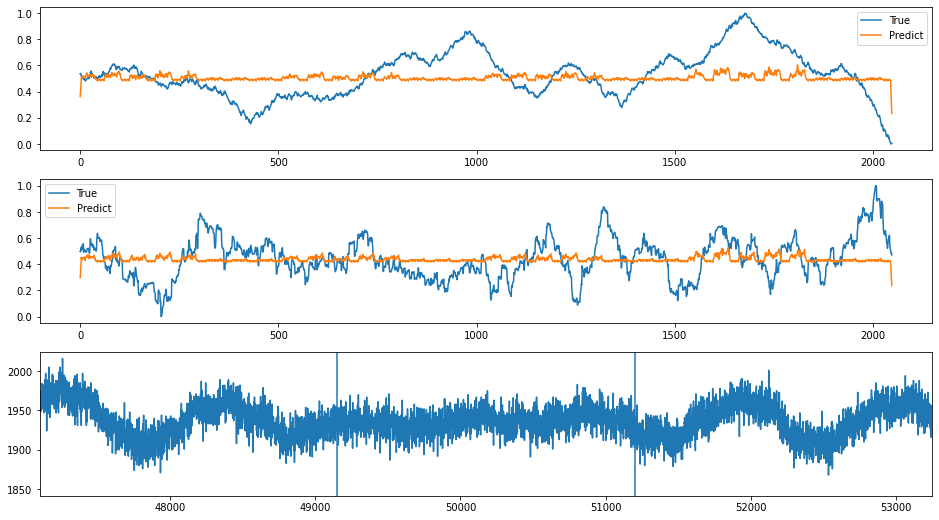

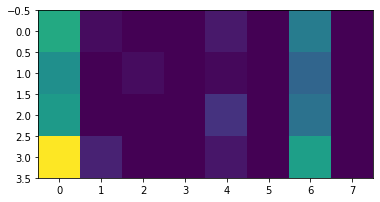

index: 132752
Error: 0.027941573295148403
type                                                         Inst
fill                                                         7386
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 11:33:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7386/...
n_bunches                                                     158
bunch_index                                                   316
bunch_number                                                   30
ts_length                                                   65536
chunk                                                          24
Name: 6352, dtype: object


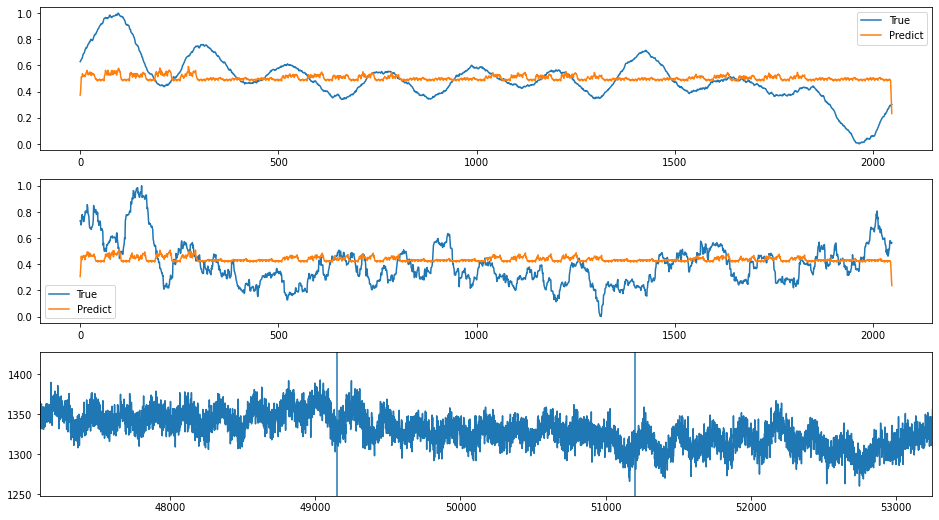

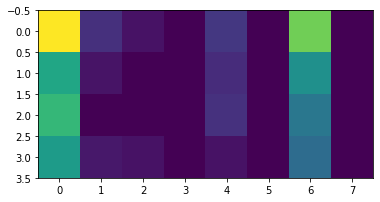

index: 372044
Error: 0.02794388978026303
type                                                         Inst
fill                                                         7478
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 14:24:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...
n_bunches                                                      20
bunch_index                                                  2808
bunch_number                                                   18
ts_length                                                   65536
chunk                                                           6
Name: 1772, dtype: object


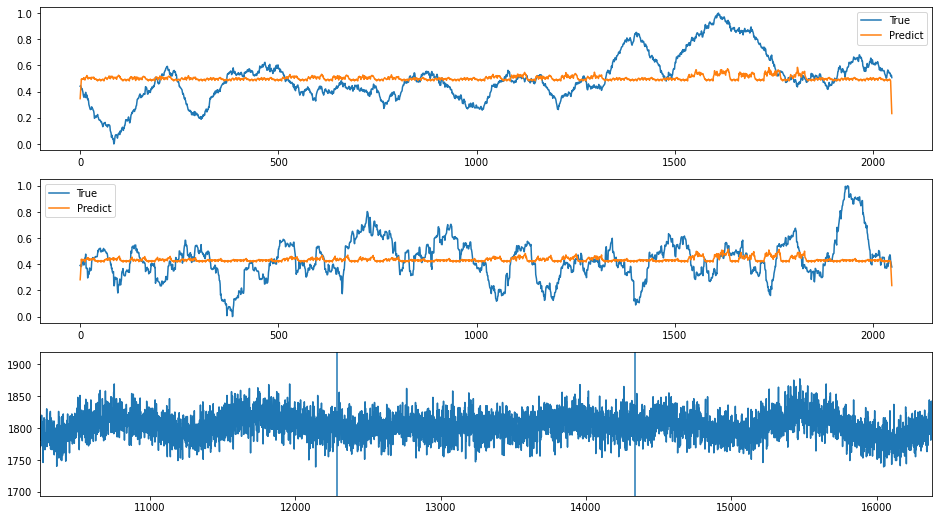

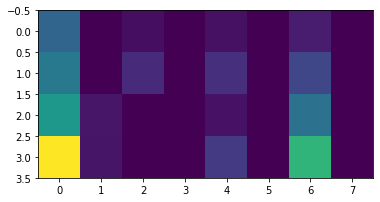

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 69299
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:51:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     524
bunch_index                                                   930
bunch_number                                                  495
ts_length                                                   65536
chunk                                                           4
Name: 1051, dtype: object


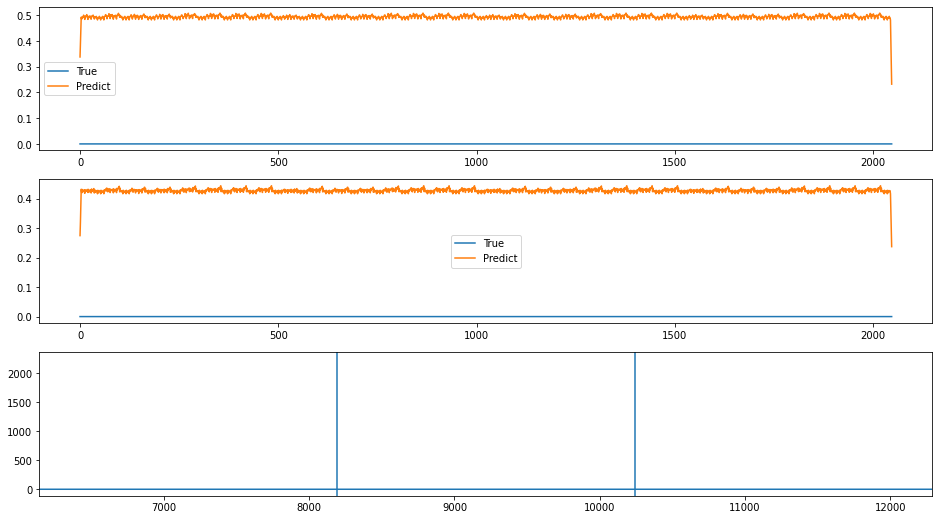

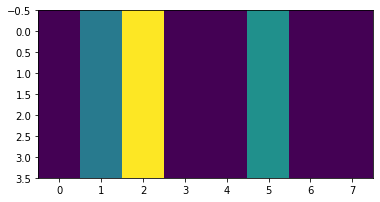

index: 39445
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7468
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-23 19:48:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7468/...
n_bunches                                                     544
bunch_index                                                  2419
bunch_number                                                  510
ts_length                                                   65536
chunk                                                           2
Name: 681, dtype: object


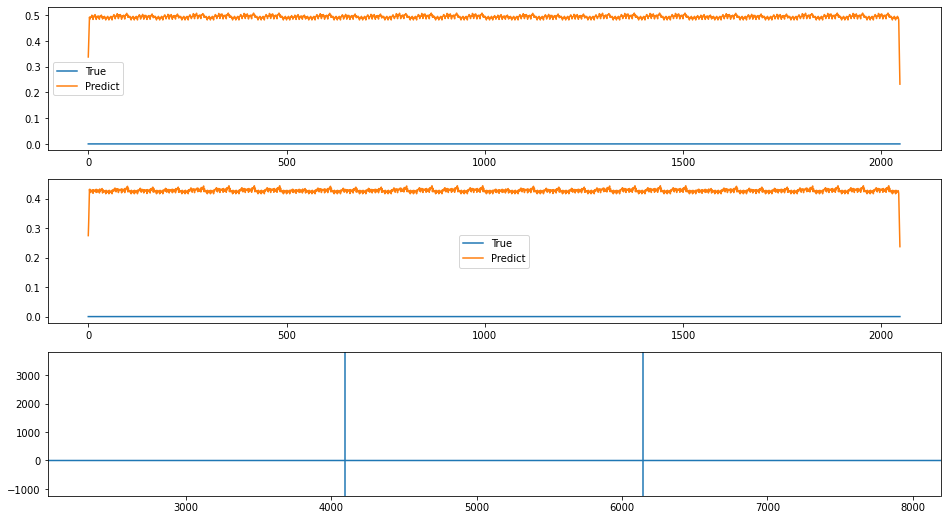

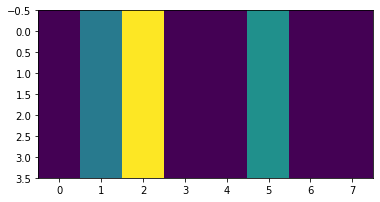

index: 93789
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 22:53:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                     172
bunch_index                                                   264
bunch_number                                                  138
ts_length                                                   65536
chunk                                                          16
Name: 4319, dtype: object


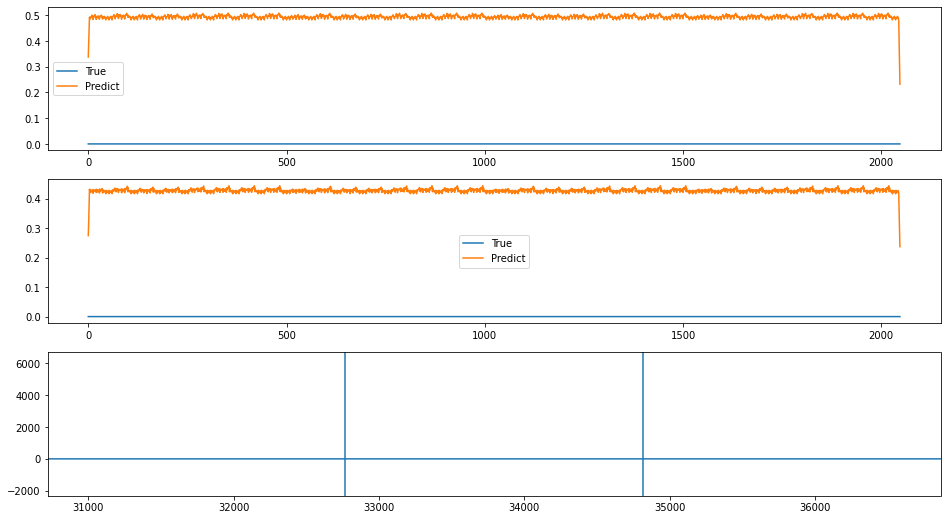

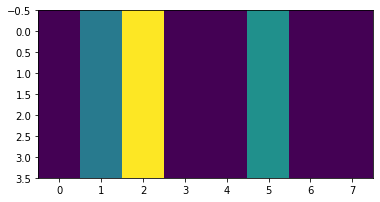

index: 318896
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6396
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 22:05:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6396/...
n_bunches                                                     332
bunch_index                                                   560
bunch_number                                                  220
ts_length                                                   65536
chunk                                                           2
Name: 704, dtype: object


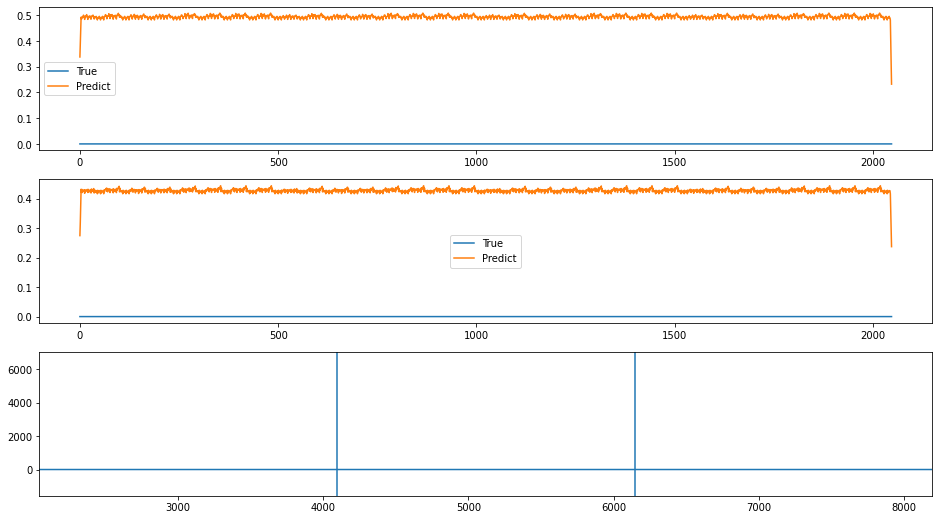

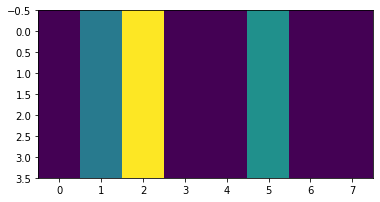

index: 332502
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:47:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     428
bunch_index                                                   679
bunch_number                                                  365
ts_length                                                   65536
chunk                                                           0
Name: 23, dtype: object


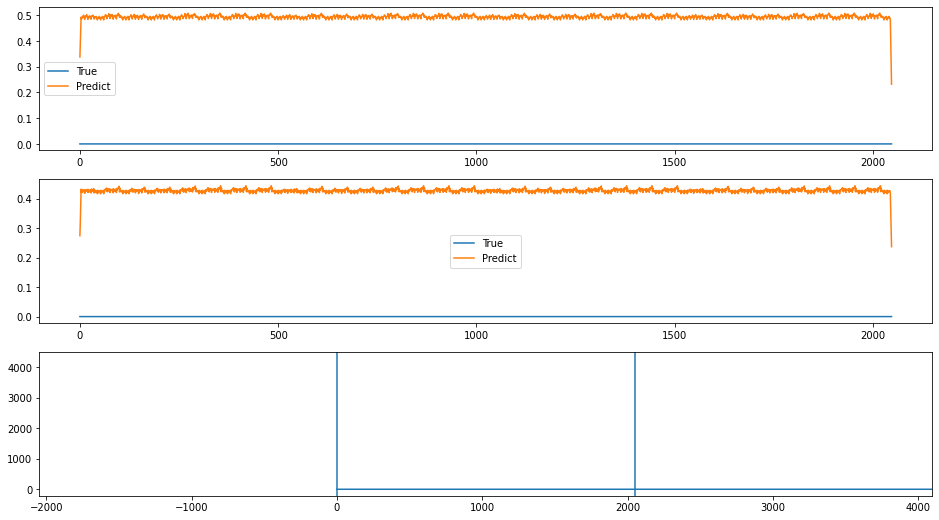

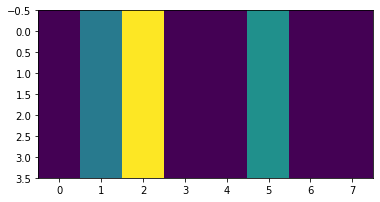

index: 107764
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7099
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-29 15:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7099/...
n_bunches                                                     396
bunch_index                                                   430
bunch_number                                                  298
ts_length                                                   65536
chunk                                                          18
Name: 4782, dtype: object


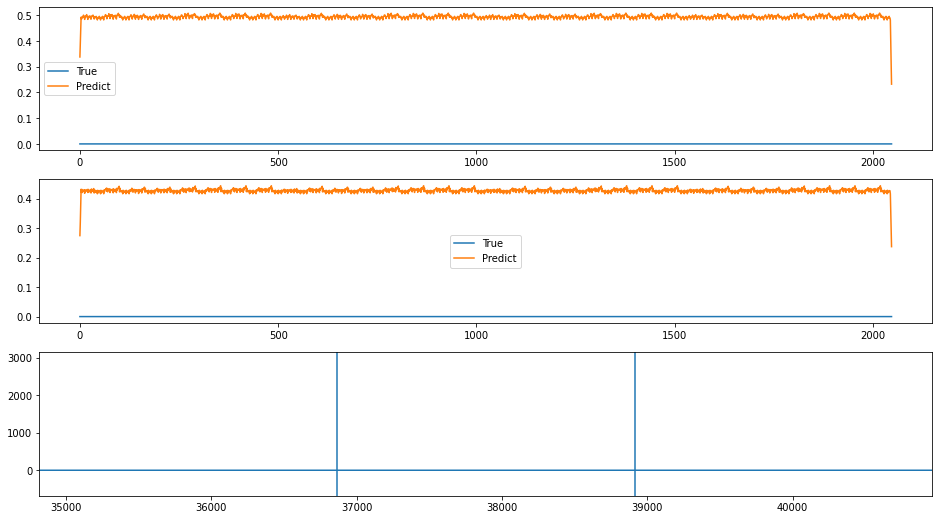

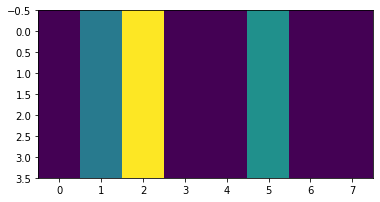

index: 78021
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6927
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-15 23:20:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6927/...
n_bunches                                                     540
bunch_index                                                   700
bunch_number                                                  509
ts_length                                                   65536
chunk                                                          13
Name: 3381, dtype: object


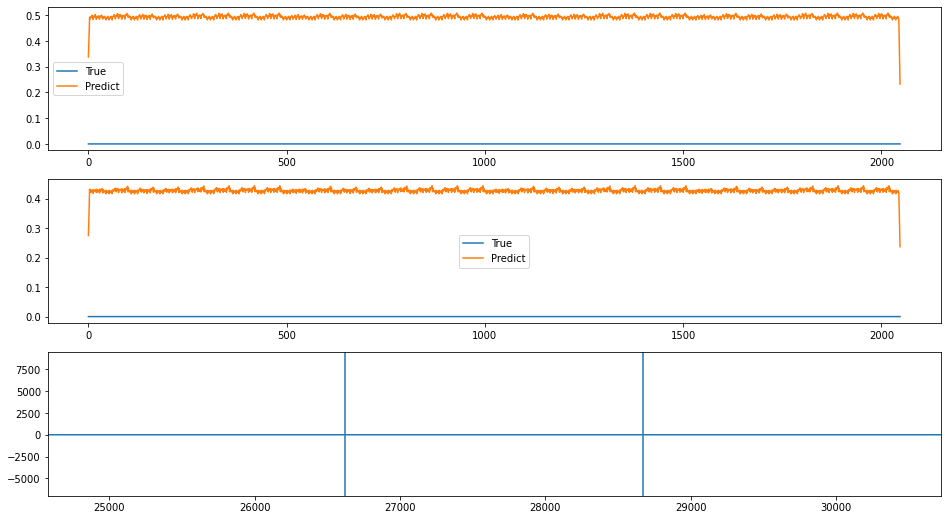

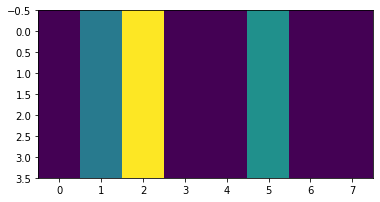

index: 138146
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7264
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-07 00:49:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...
n_bunches                                                     540
bunch_index                                                   577
bunch_number                                                  400
ts_length                                                   65536
chunk                                                           5
Name: 1377, dtype: object


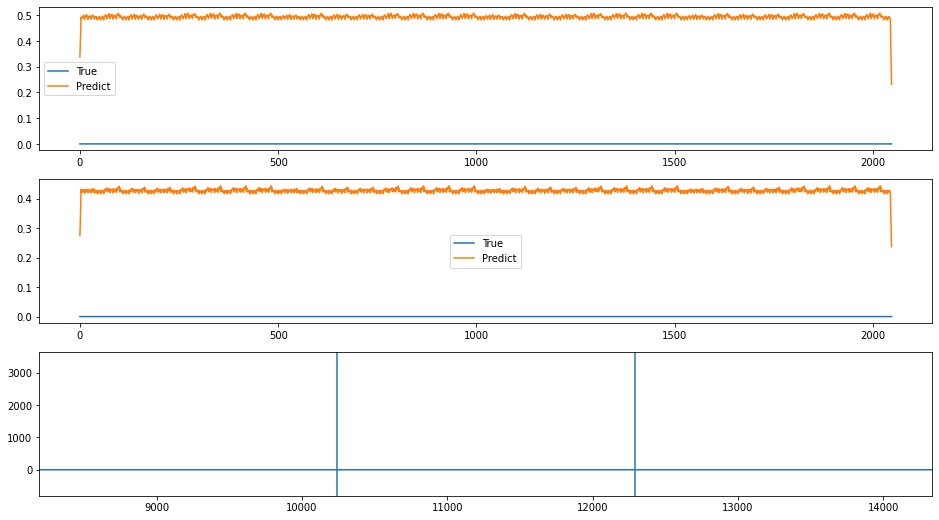

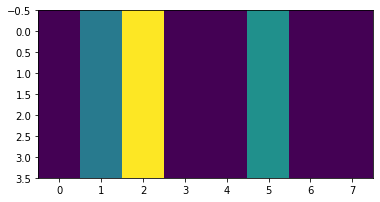

index: 303711
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                   206
bunch_number                                                   22
ts_length                                                   65536
chunk                                                          23
Name: 5898, dtype: object


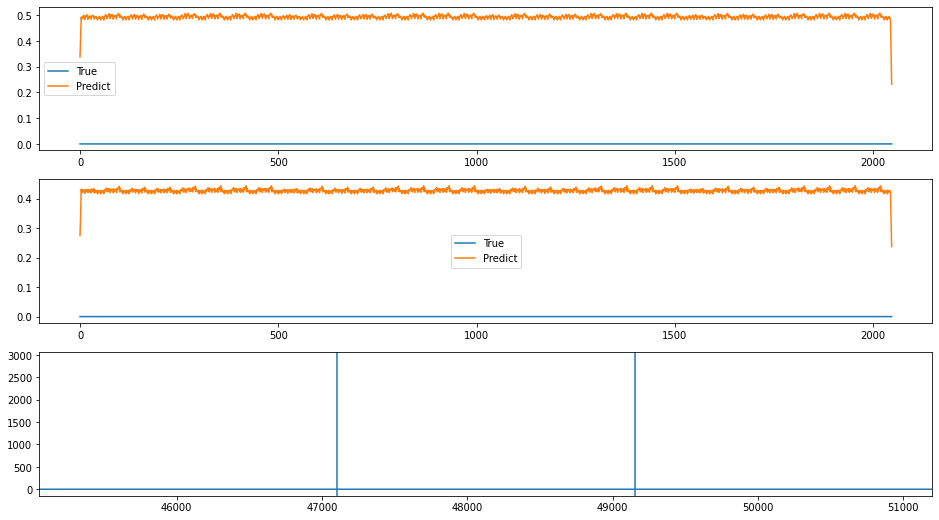

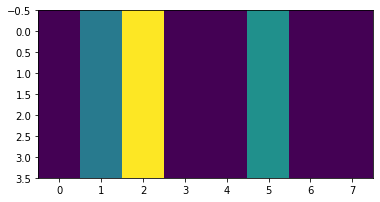

index: 299239
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7449
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-16 17:31:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7449/...
n_bunches                                                     408
bunch_index                                                  2107
bunch_number                                                  393
ts_length                                                   65536
chunk                                                           5
Name: 1283, dtype: object


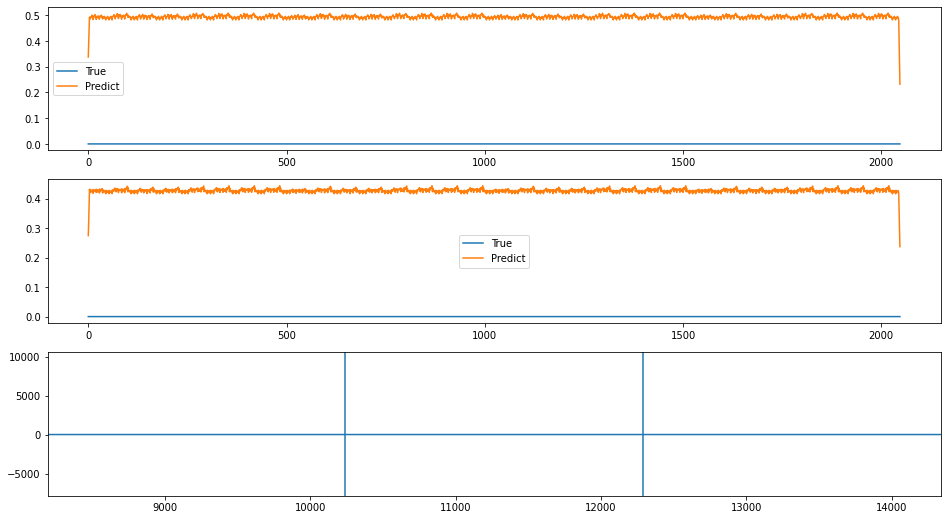

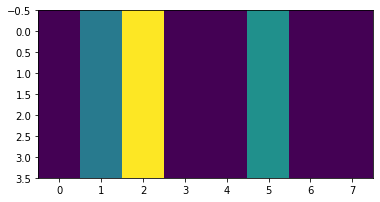

index: 132893
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6398
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-19 21:06:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6398/...
n_bunches                                                     396
bunch_index                                                   746
bunch_number                                                  280
ts_length                                                   65536
chunk                                                           1
Name: 449, dtype: object


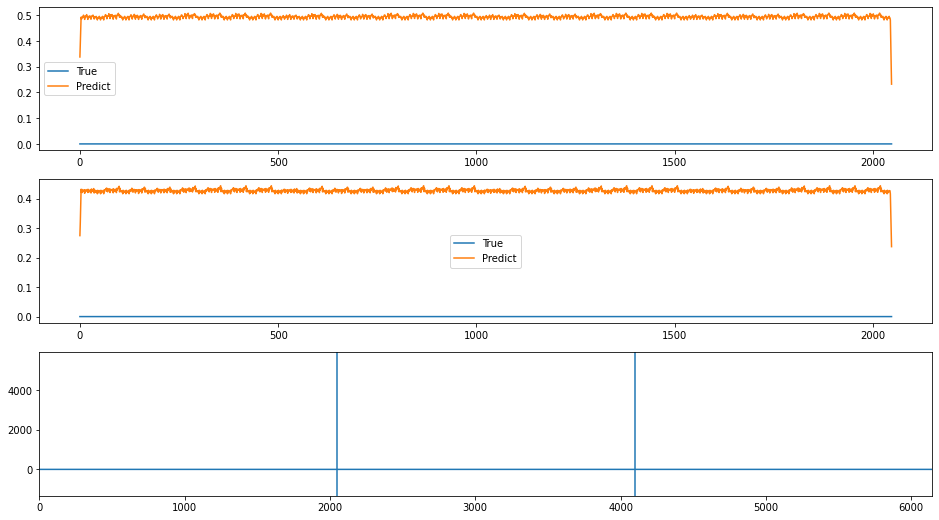

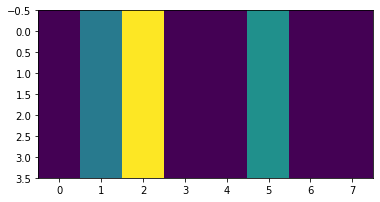

index: 291345
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6392
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 05:18:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6392/...
n_bunches                                                     620
bunch_index                                                  1024
bunch_number                                                  508
ts_length                                                   65536
chunk                                                           1
Name: 380, dtype: object


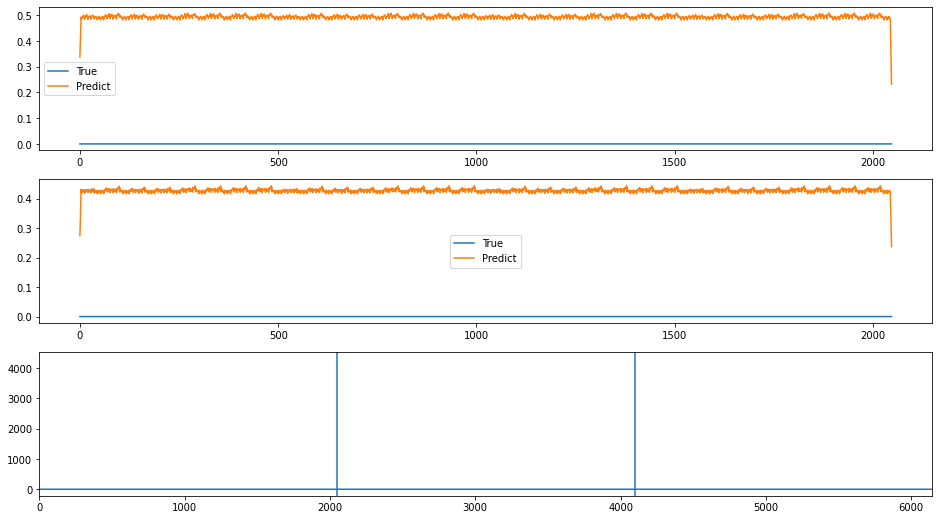

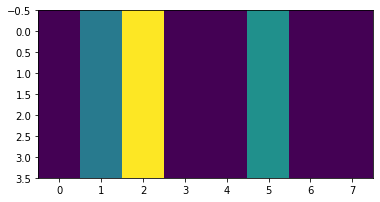

index: 66999
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:51:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     524
bunch_index                                                   930
bunch_number                                                  495
ts_length                                                   65536
chunk                                                           0
Name: 27, dtype: object


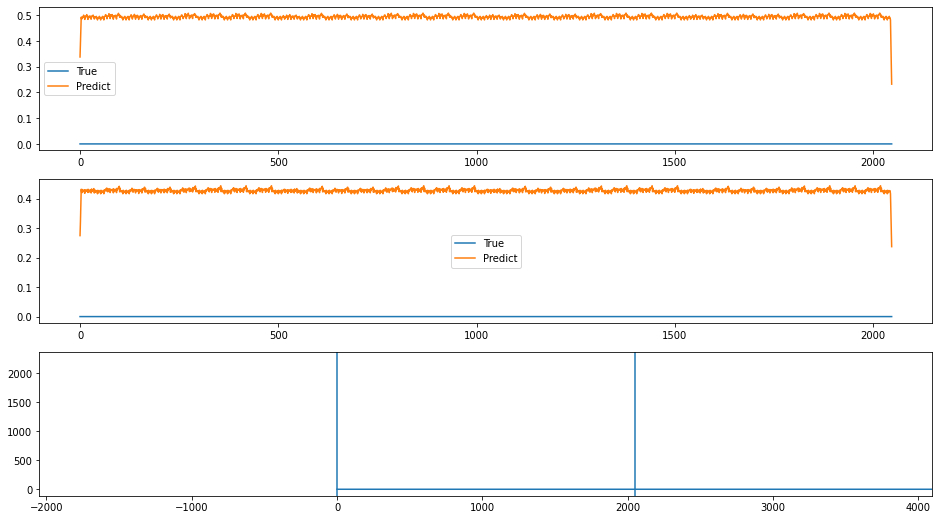

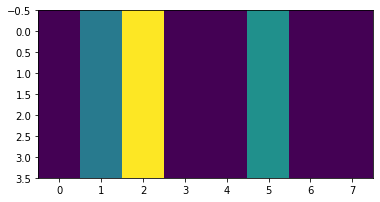

index: 95192
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 22:53:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                     172
bunch_index                                                   264
bunch_number                                                  138
ts_length                                                   65536
chunk                                                          19
Name: 5087, dtype: object


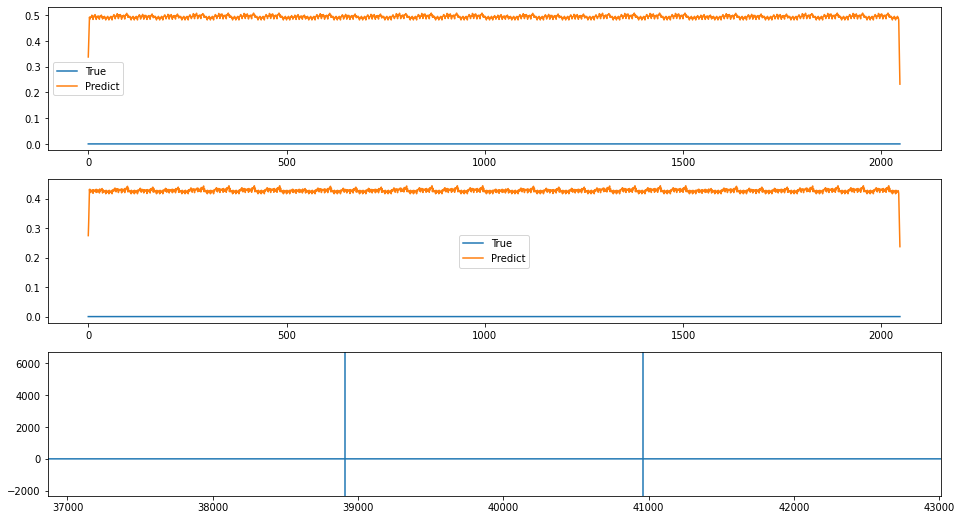

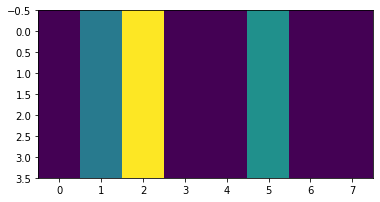

index: 74254
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6671
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-11 16:02:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6671/...
n_bunches                                                     156
bunch_index                                                   296
bunch_number                                                   87
ts_length                                                   65536
chunk                                                          29
Name: 7564, dtype: object


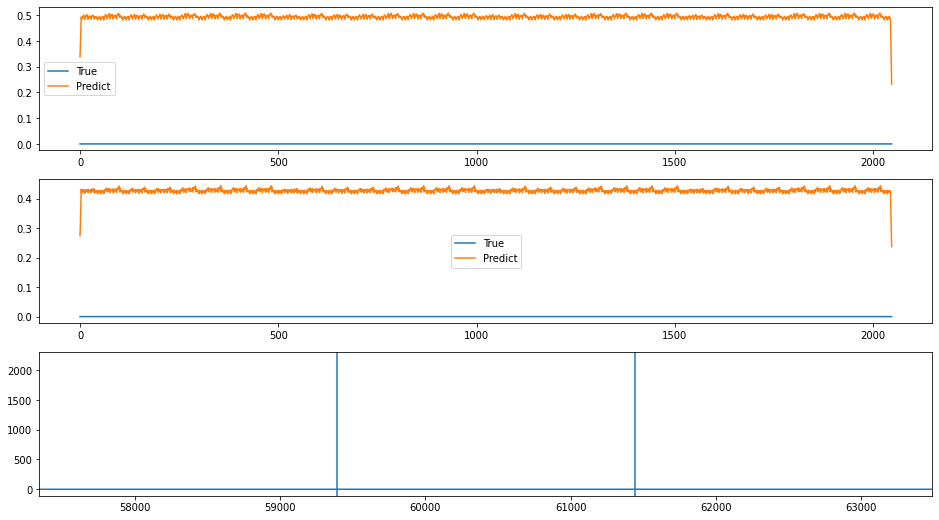

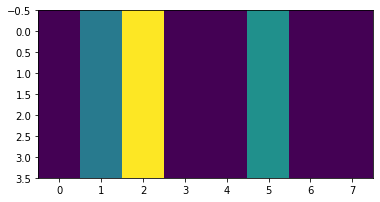

index: 285488
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7128
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-06 03:07:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7128/...
n_bunches                                                     108
bunch_index                                                   134
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           6
Name: 1552, dtype: object


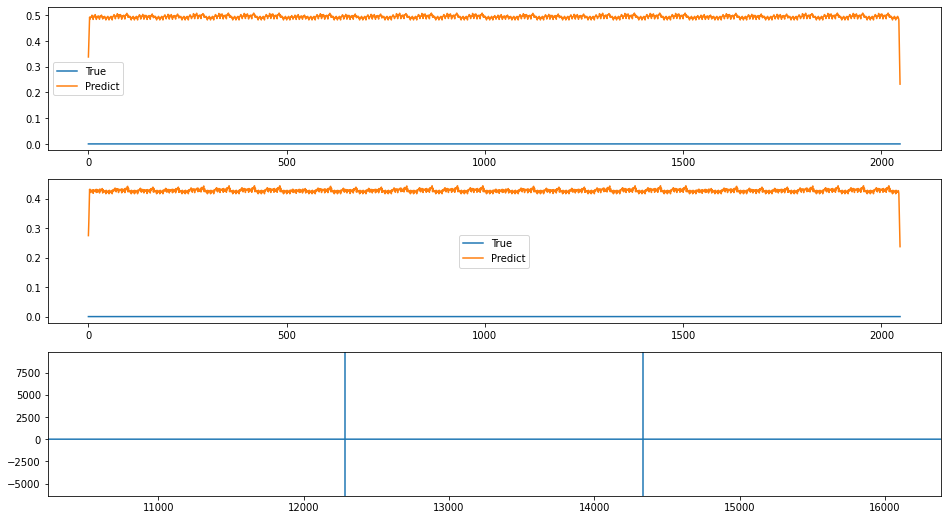

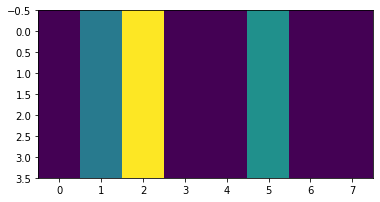

index: 21281
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6620
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-28 20:33:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6620/...
n_bunches                                                     794
bunch_index                                                  1963
bunch_number                                                  677
ts_length                                                   65536
chunk                                                           0
Name: 127, dtype: object


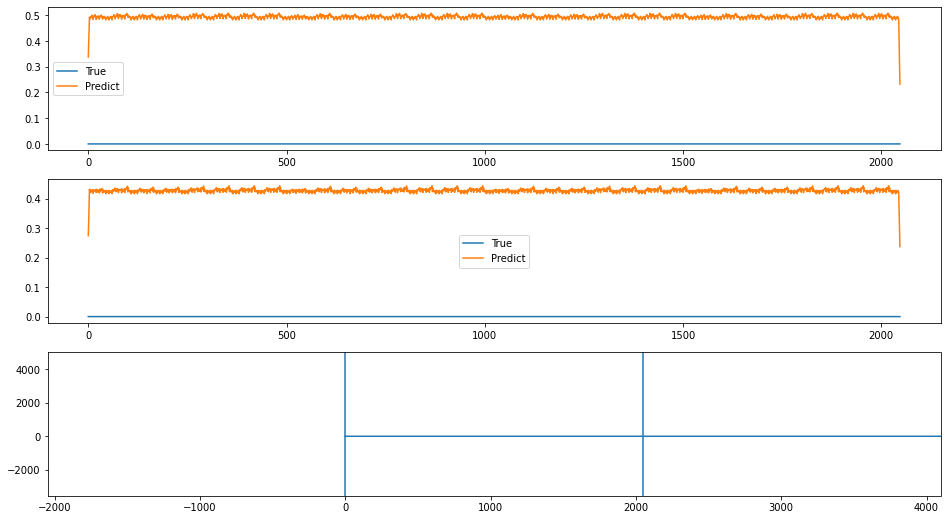

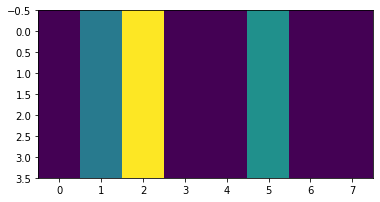

index: 138900
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7449
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-16 17:40:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7449/...
n_bunches                                                     480
bunch_index                                                  2437
bunch_number                                                  455
ts_length                                                   65536
chunk                                                           7
Name: 1864, dtype: object


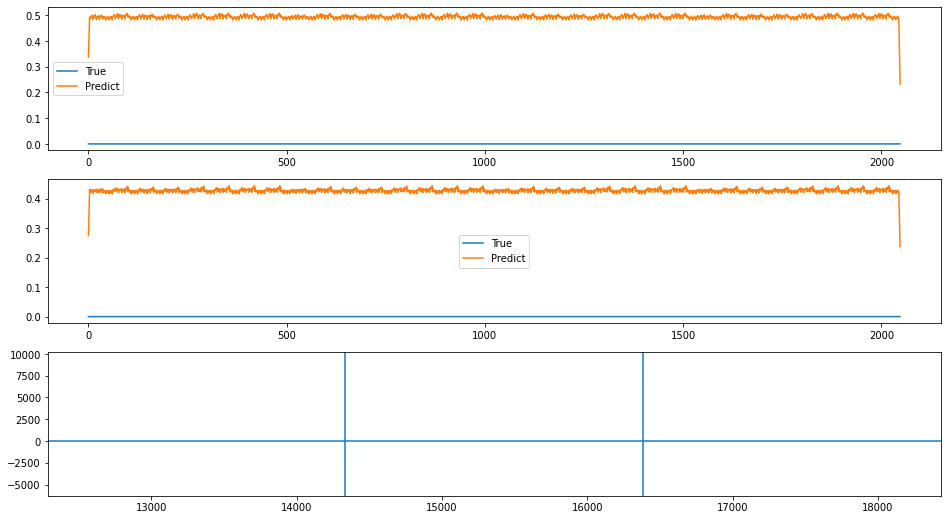

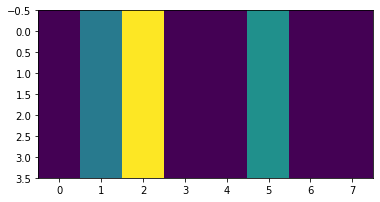

index: 136192
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7264
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-07 00:49:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...
n_bunches                                                     540
bunch_index                                                   577
bunch_number                                                  400
ts_length                                                   65536
chunk                                                           0
Name: 97, dtype: object


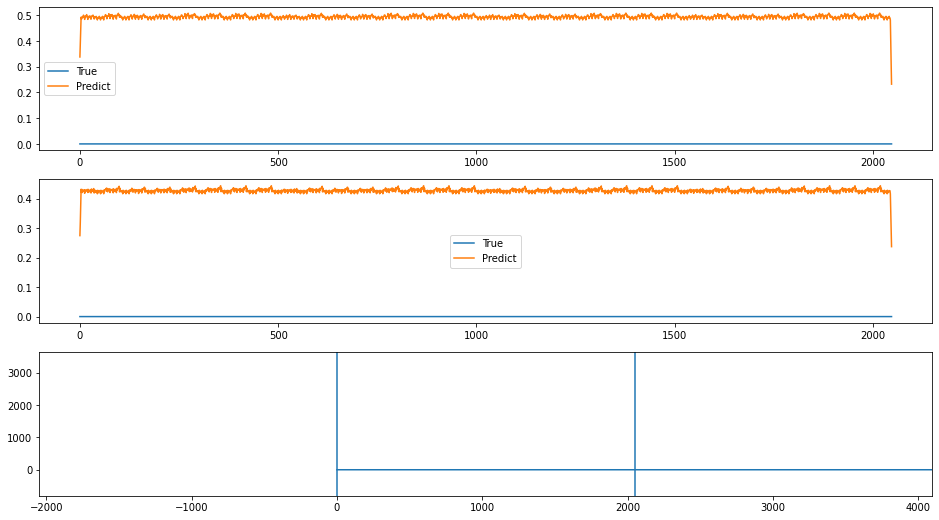

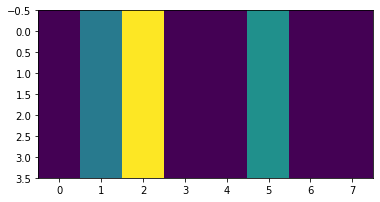

index: 17092
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6620
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-28 20:33:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6620/...
n_bunches                                                     794
bunch_index                                                  1963
bunch_number                                                  677
ts_length                                                   65536
chunk                                                          27
Name: 7039, dtype: object


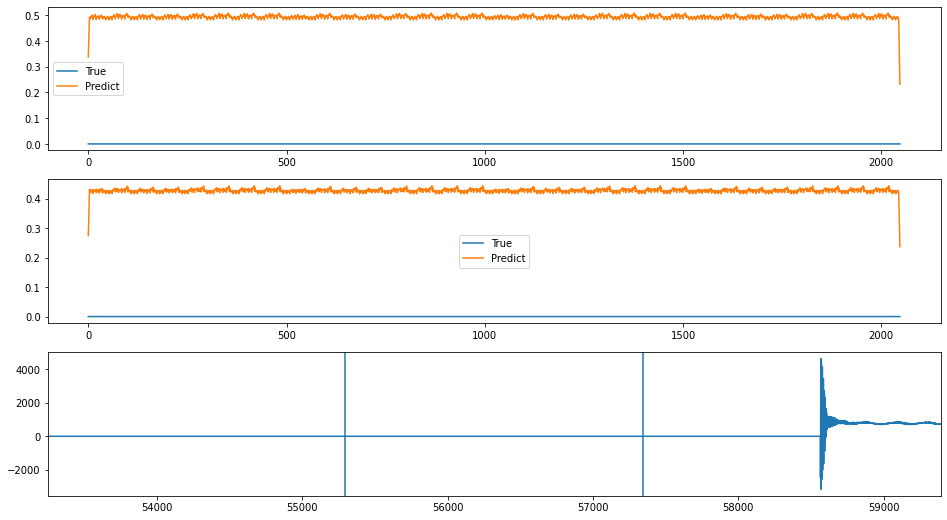

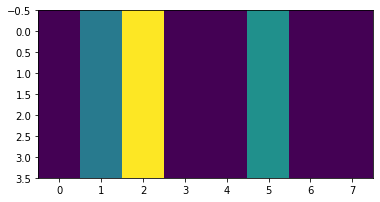

index: 282898
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                   754
bunch_number                                                  146
ts_length                                                   65536
chunk                                                          14
Name: 3787, dtype: object


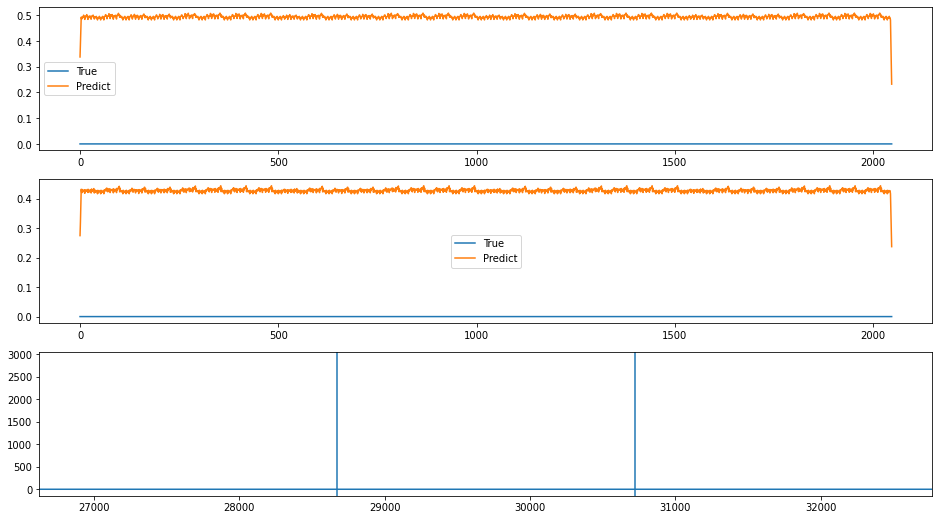

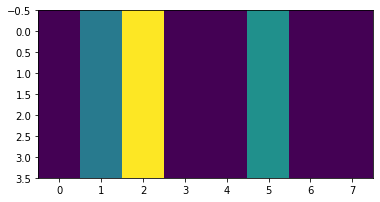

index: 182939
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6395
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 20:11:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6395/...
n_bunches                                                     748
bunch_index                                                  1349
bunch_number                                                  699
ts_length                                                   65536
chunk                                                           2
Name: 587, dtype: object


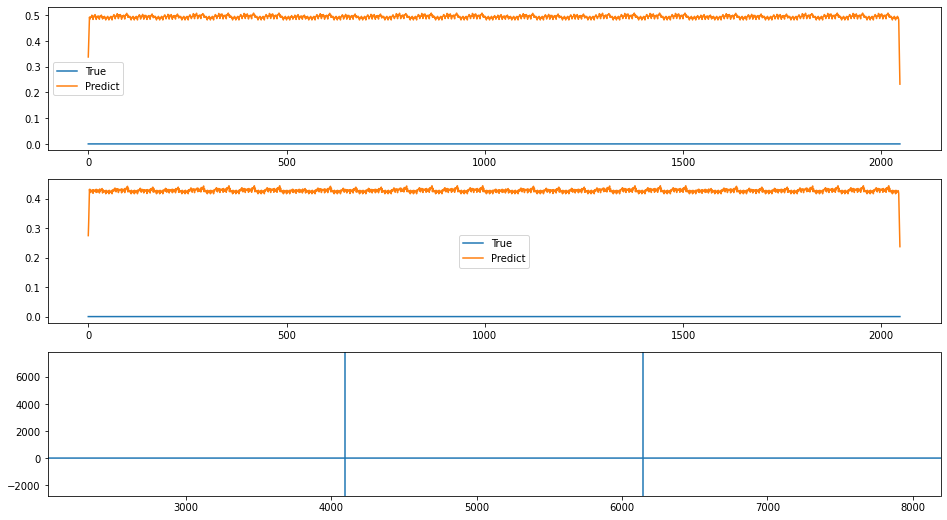

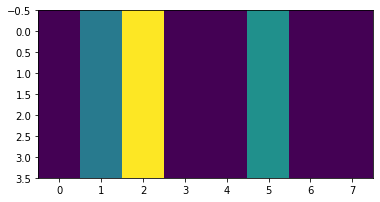

index: 282951
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                   754
bunch_number                                                  146
ts_length                                                   65536
chunk                                                          11
Name: 3019, dtype: object


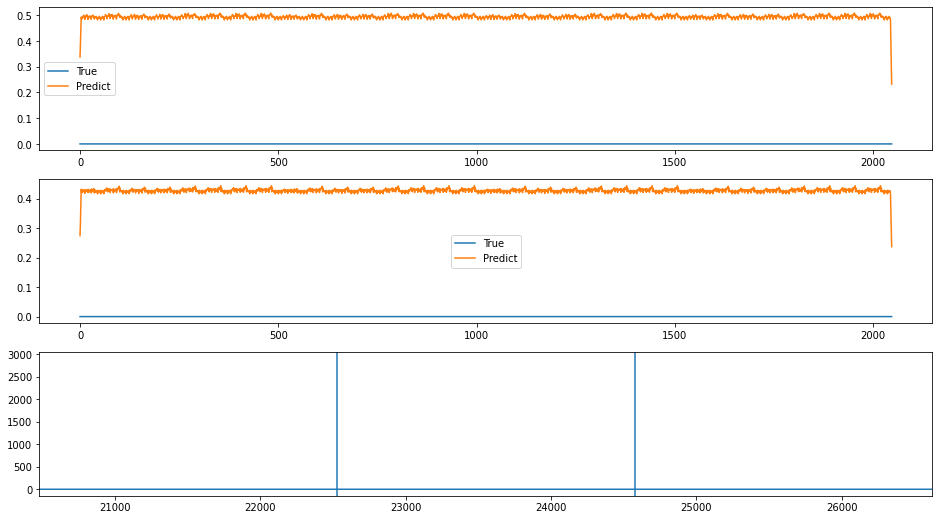

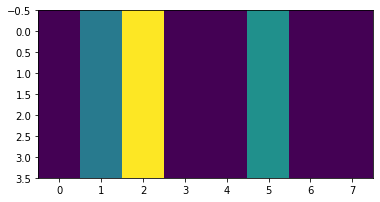

index: 50833
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                   690
bunch_number                                                  131
ts_length                                                   65536
chunk                                                          21
Name: 5621, dtype: object


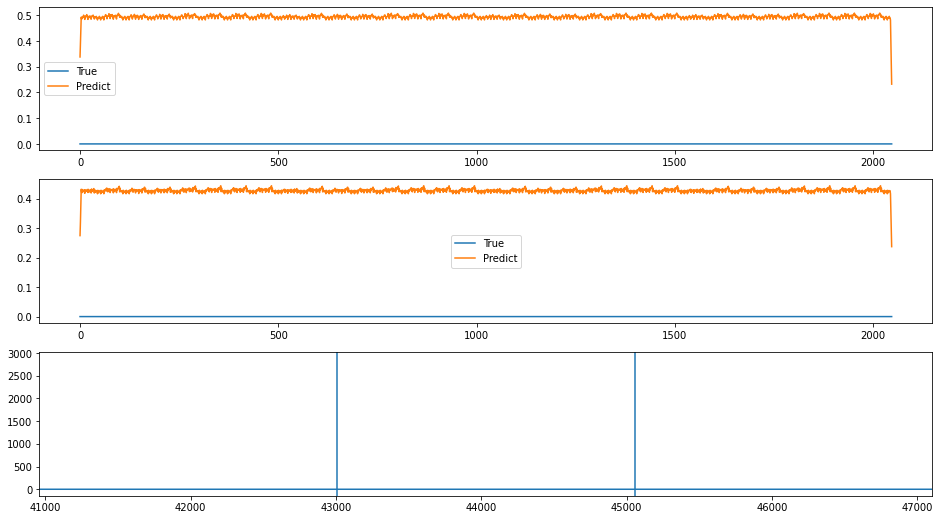

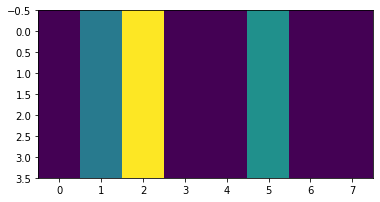

index: 138131
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7264
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-07 00:49:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...
n_bunches                                                     540
bunch_index                                                   577
bunch_number                                                  400
ts_length                                                   65536
chunk                                                           6
Name: 1633, dtype: object


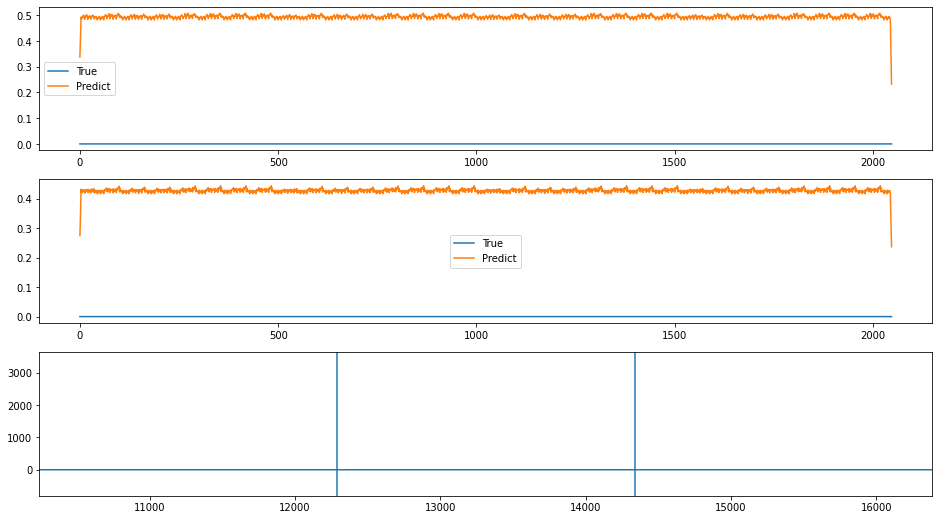

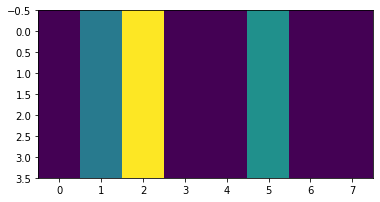

index: 35955
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7468
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-23 19:48:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7468/...
n_bunches                                                     544
bunch_index                                                  2419
bunch_number                                                  510
ts_length                                                   65536
chunk                                                           1
Name: 425, dtype: object


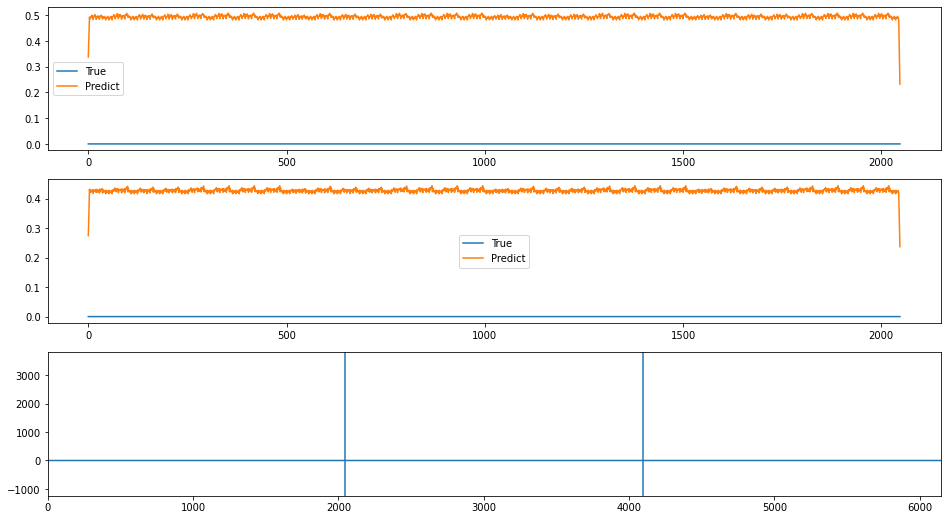

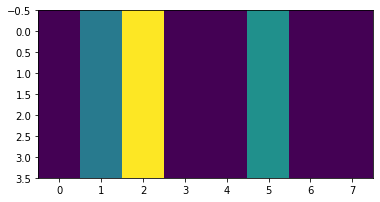

index: 103598
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7099
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-29 15:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7099/...
n_bunches                                                     396
bunch_index                                                   430
bunch_number                                                  298
ts_length                                                   65536
chunk                                                          16
Name: 4270, dtype: object


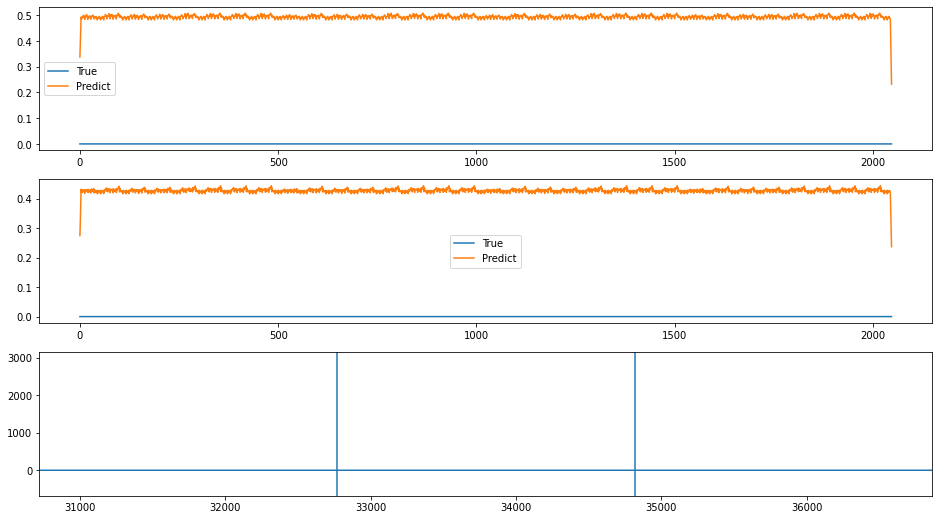

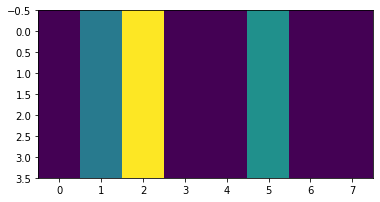

index: 111410
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6284
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 16:46:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6284/...
n_bunches                                                    1260
bunch_index                                                  2265
bunch_number                                                 1223
ts_length                                                   65536
chunk                                                           1
Name: 342, dtype: object


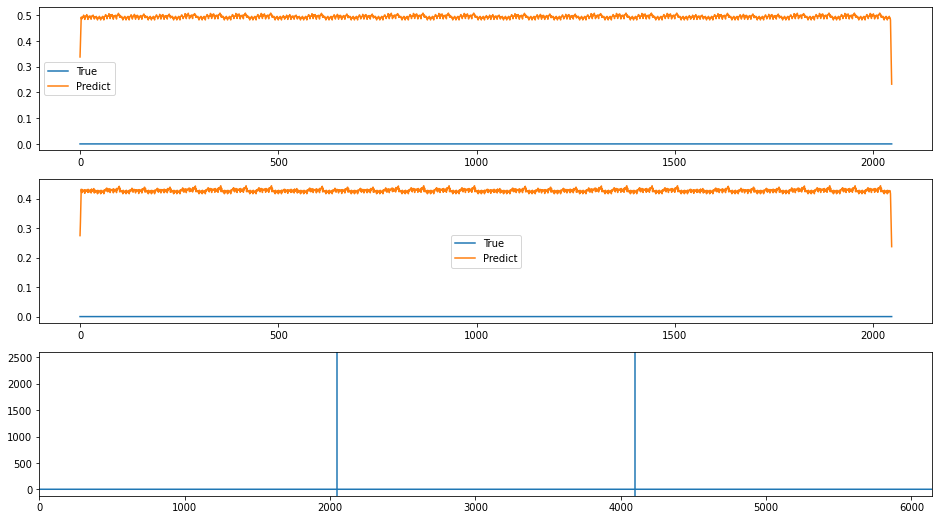

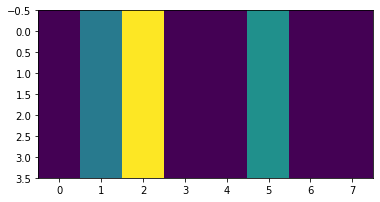

index: 189776
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6395
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 20:11:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6395/...
n_bunches                                                     748
bunch_index                                                  1349
bunch_number                                                  699
ts_length                                                   65536
chunk                                                           0
Name: 75, dtype: object


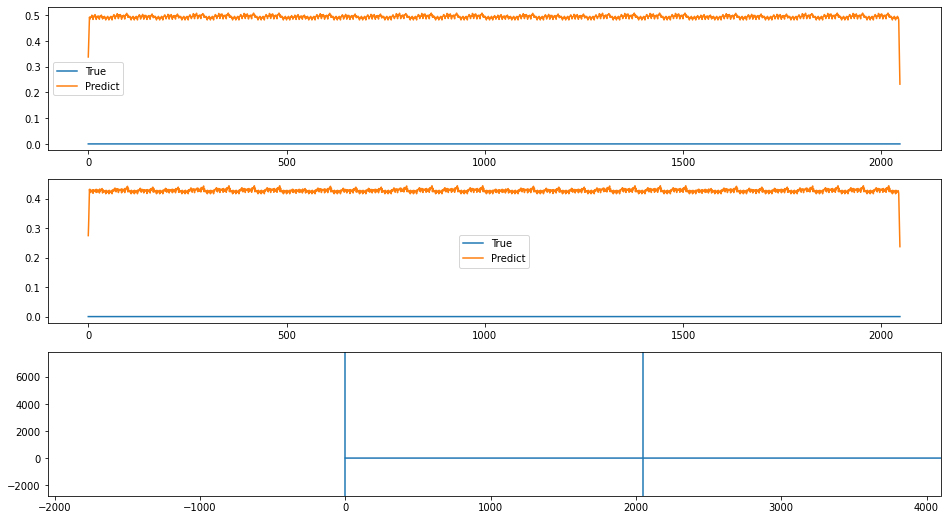

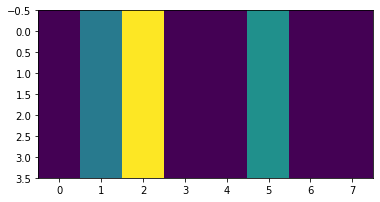

index: 96912
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-17 13:18:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7451/...
n_bunches                                                     108
bunch_index                                                   445
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           2
Name: 671, dtype: object


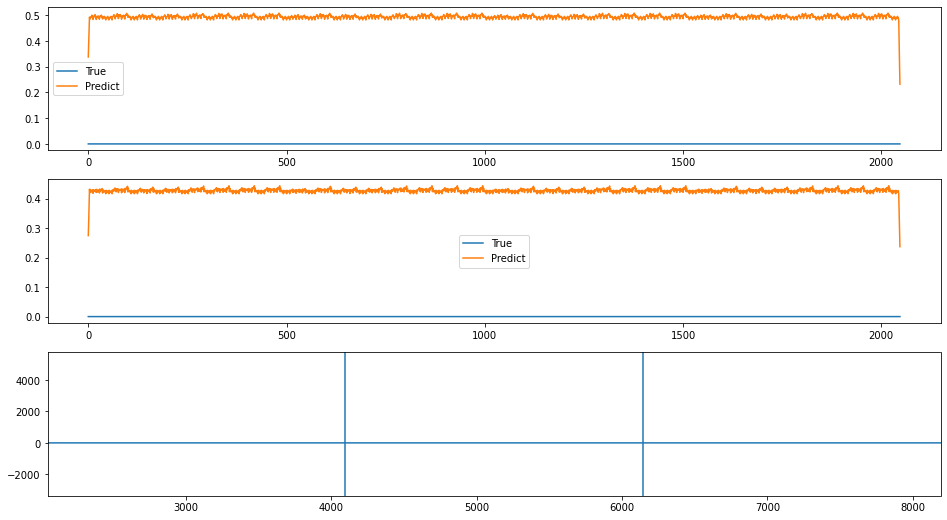

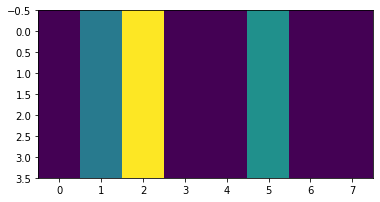

index: 285445
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7128
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-06 03:07:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7128/...
n_bunches                                                     108
bunch_index                                                   134
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           3
Name: 784, dtype: object


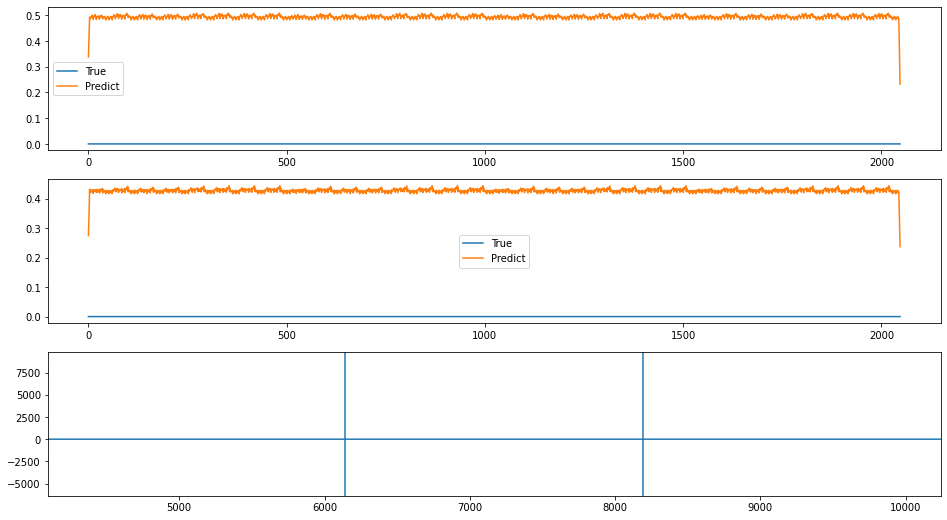

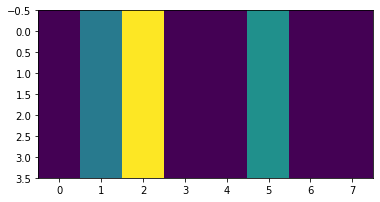

index: 154275
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7355
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 21:47:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7355/...
n_bunches                                                     492
bunch_index                                                  1005
bunch_number                                                  467
ts_length                                                   65536
chunk                                                          10
Name: 2621, dtype: object


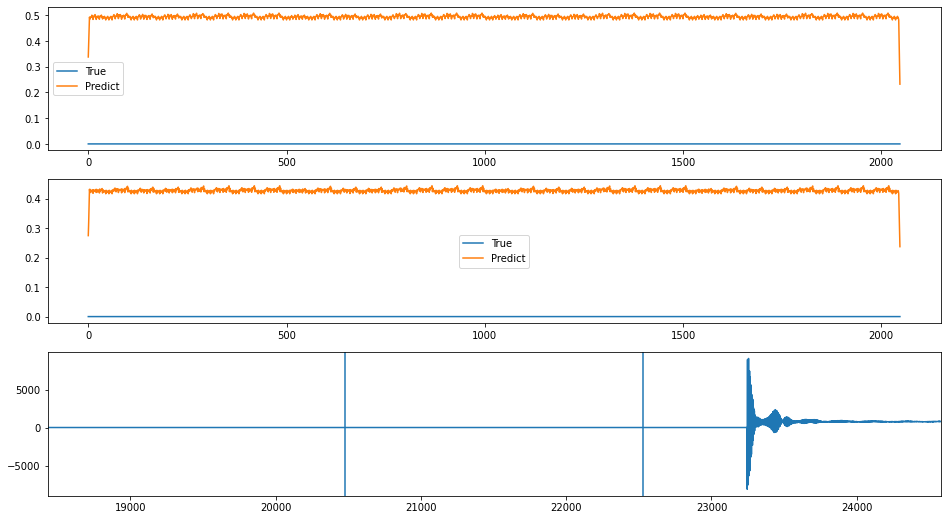

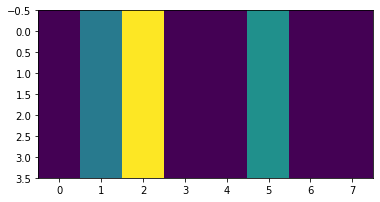

index: 117617
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7479
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 21:15:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7479/...
n_bunches                                                     166
bunch_index                                                   649
bunch_number                                                  135
ts_length                                                   65536
chunk                                                           3
Name: 905, dtype: object


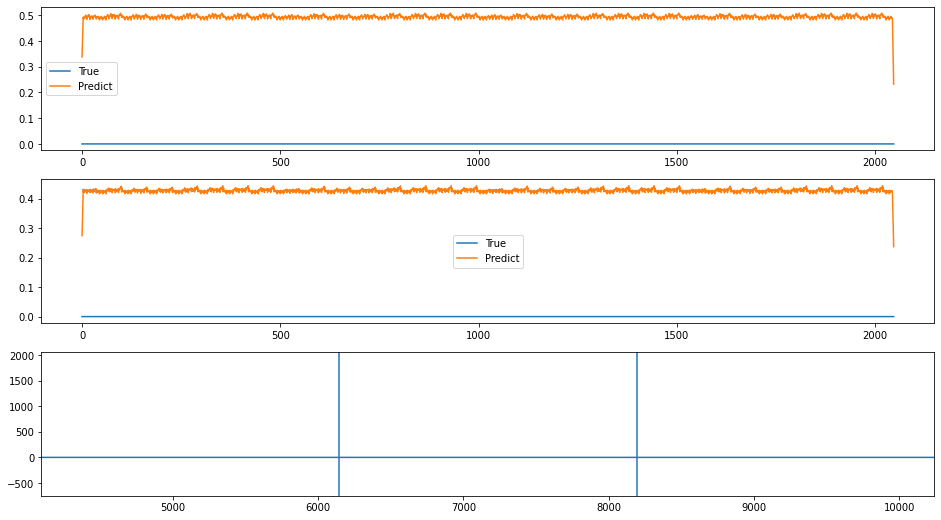

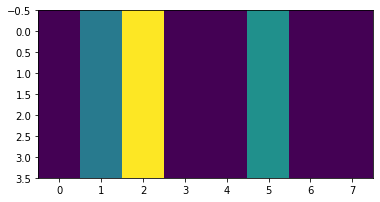

index: 105506
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7099
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-29 15:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7099/...
n_bunches                                                     396
bunch_index                                                   430
bunch_number                                                  298
ts_length                                                   65536
chunk                                                          12
Name: 3246, dtype: object


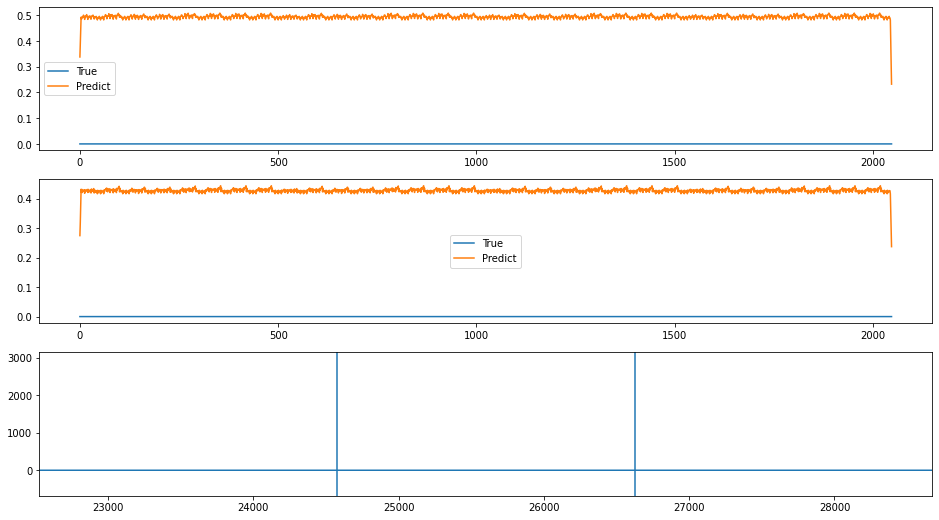

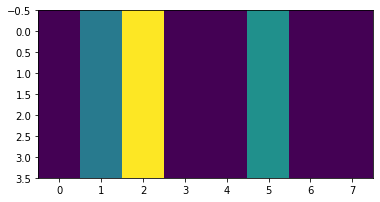

index: 98684
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-04 17:28:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6362/...
n_bunches                                                     172
bunch_index                                                   202
bunch_number                                                   99
ts_length                                                   65536
chunk                                                           0
Name: 187, dtype: object


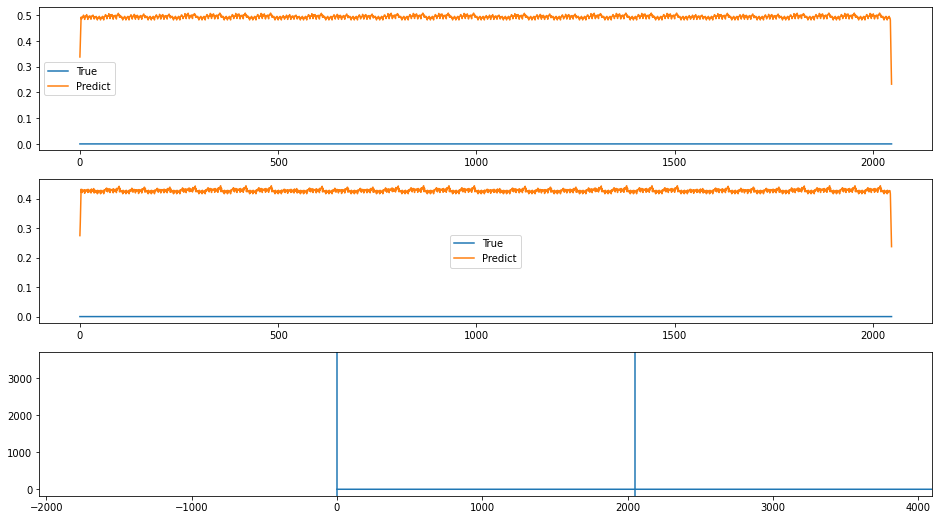

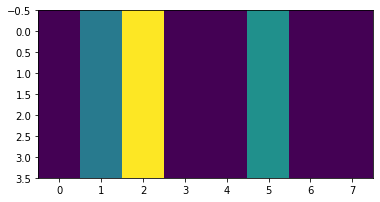

index: 74283
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6927
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-15 23:20:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6927/...
n_bunches                                                     540
bunch_index                                                   700
bunch_number                                                  509
ts_length                                                   65536
chunk                                                           0
Name: 53, dtype: object


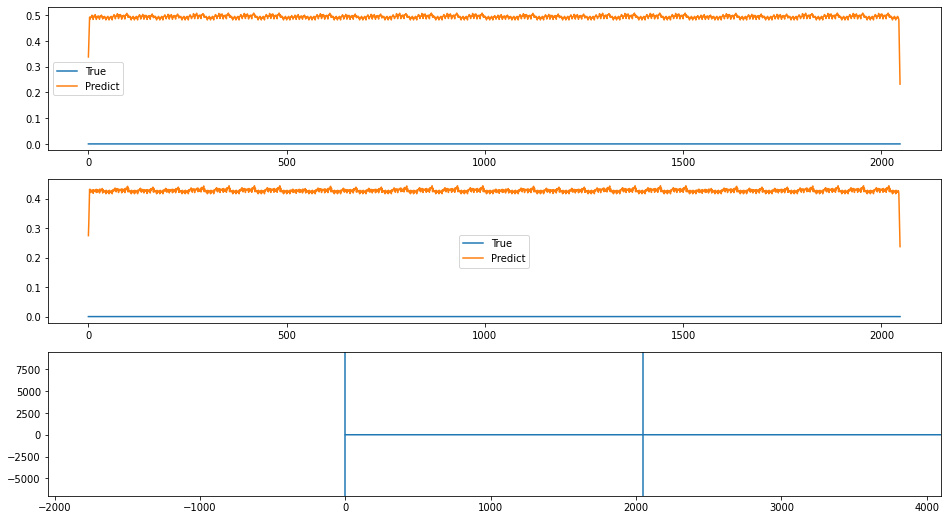

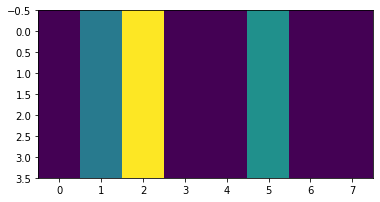

index: 282826
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                   754
bunch_number                                                  146
ts_length                                                   65536
chunk                                                          25
Name: 6603, dtype: object


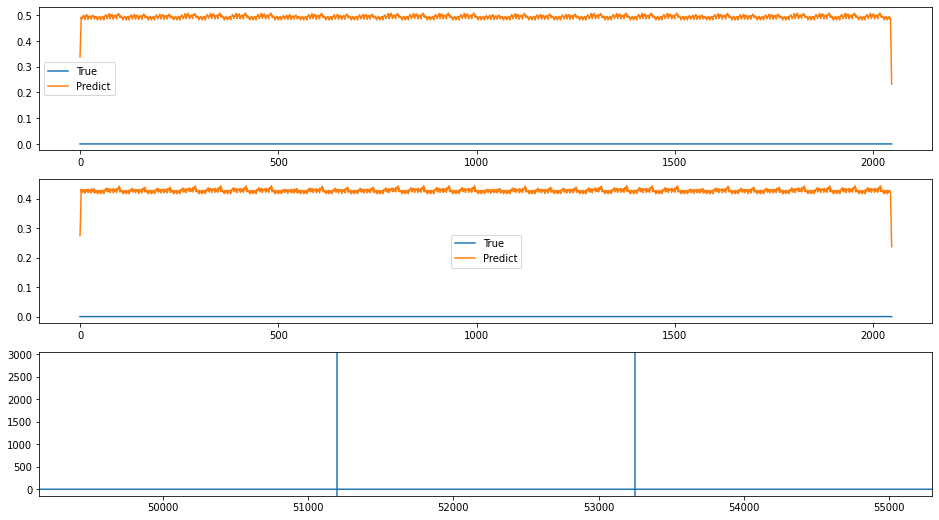

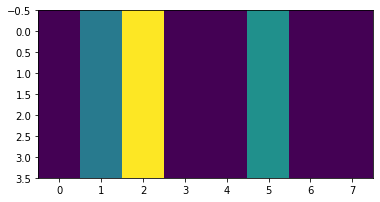

index: 291377
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6415
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-25 04:10:57
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6415/...
n_bunches                                                     172
bunch_index                                                   171
bunch_number                                                   76
ts_length                                                   65536
chunk                                                           2
Name: 703, dtype: object


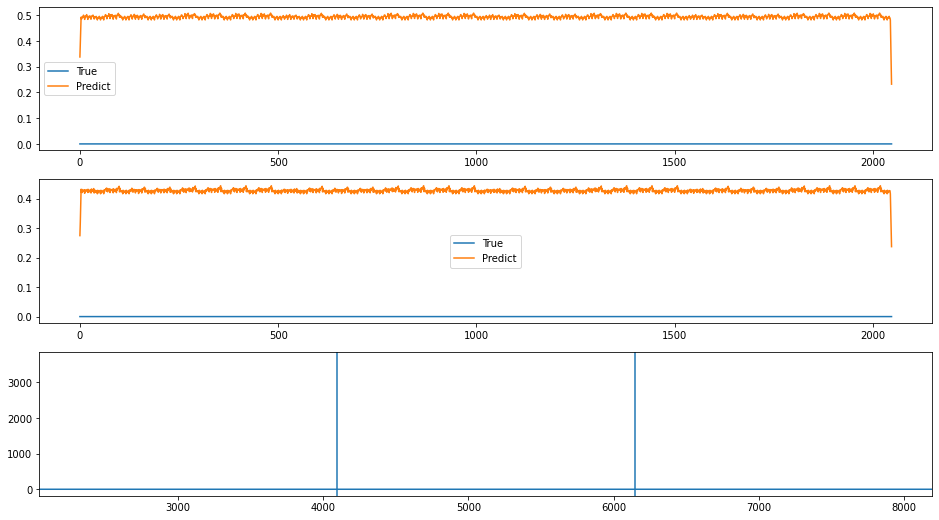

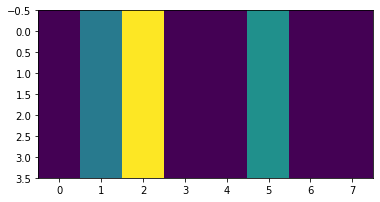

index: 75379
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6671
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-11 16:02:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6671/...
n_bunches                                                     156
bunch_index                                                   296
bunch_number                                                   87
ts_length                                                   65536
chunk                                                          20
Name: 5260, dtype: object


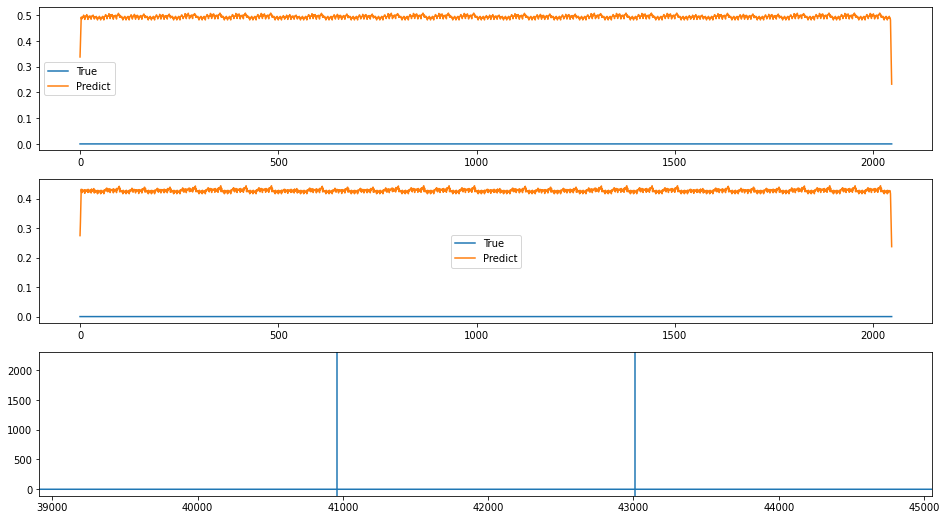

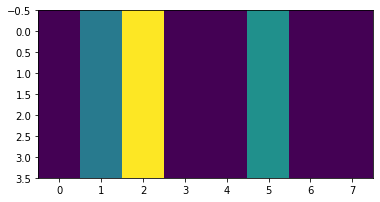

index: 77984
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6927
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-15 23:20:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6927/...
n_bunches                                                     540
bunch_index                                                   700
bunch_number                                                  509
ts_length                                                   65536
chunk                                                           5
Name: 1333, dtype: object


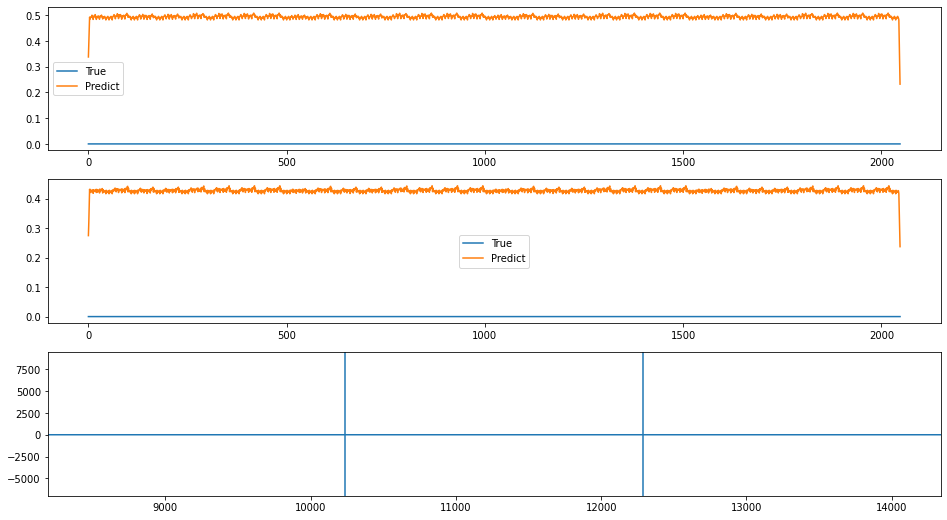

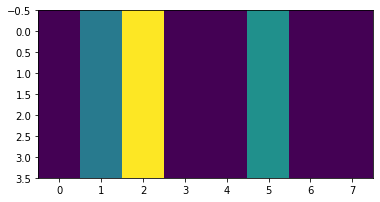

index: 113347
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7479
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 21:15:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7479/...
n_bunches                                                     166
bunch_index                                                   649
bunch_number                                                  135
ts_length                                                   65536
chunk                                                           0
Name: 137, dtype: object


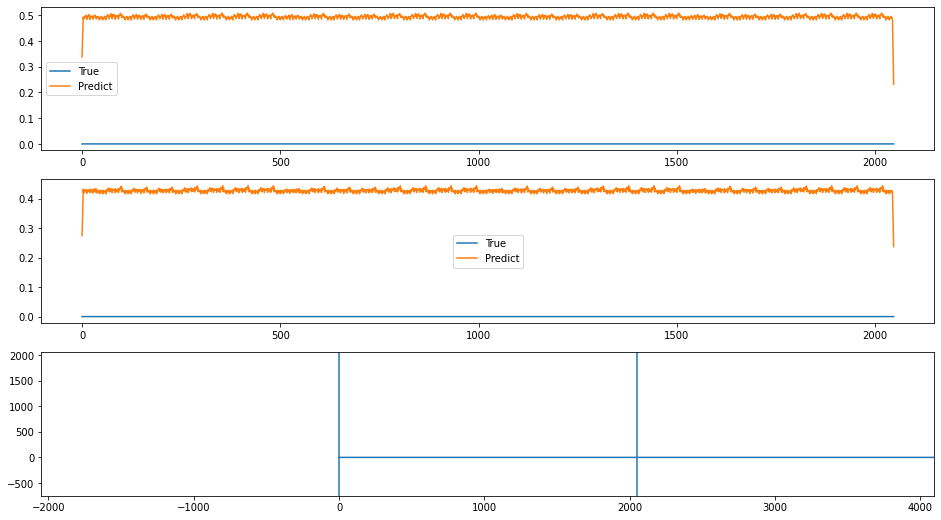

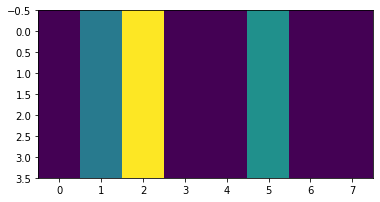

index: 282704
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 10:51:10
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                     524
bunch_index                                                   895
bunch_number                                                  475
ts_length                                                   65536
chunk                                                           0
Name: 217, dtype: object


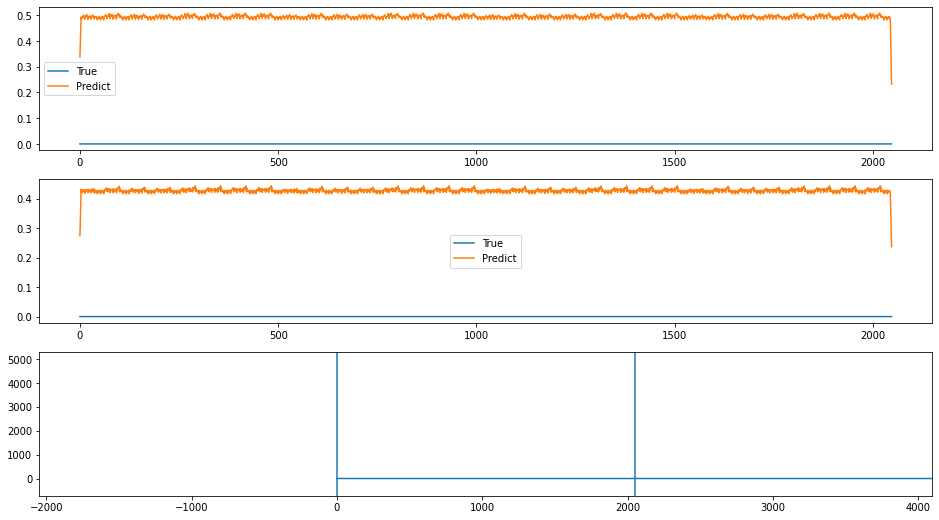

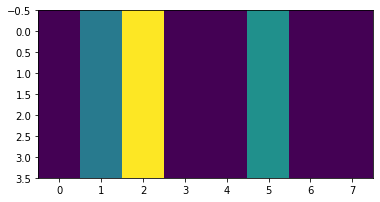

index: 282689
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7128
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-06 03:07:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7128/...
n_bunches                                                     108
bunch_index                                                   134
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           0
Name: 16, dtype: object


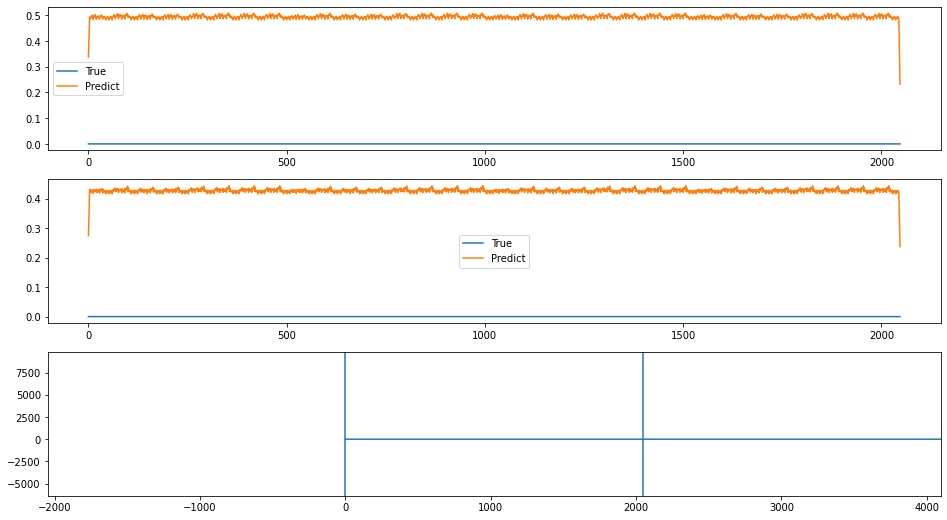

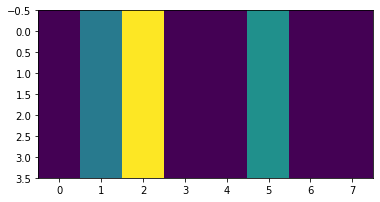

index: 149904
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7114
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-01 21:32:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7114/...
n_bunches                                                    1212
bunch_index                                                  1579
bunch_number                                                 1166
ts_length                                                   65536
chunk                                                           1
Name: 492, dtype: object


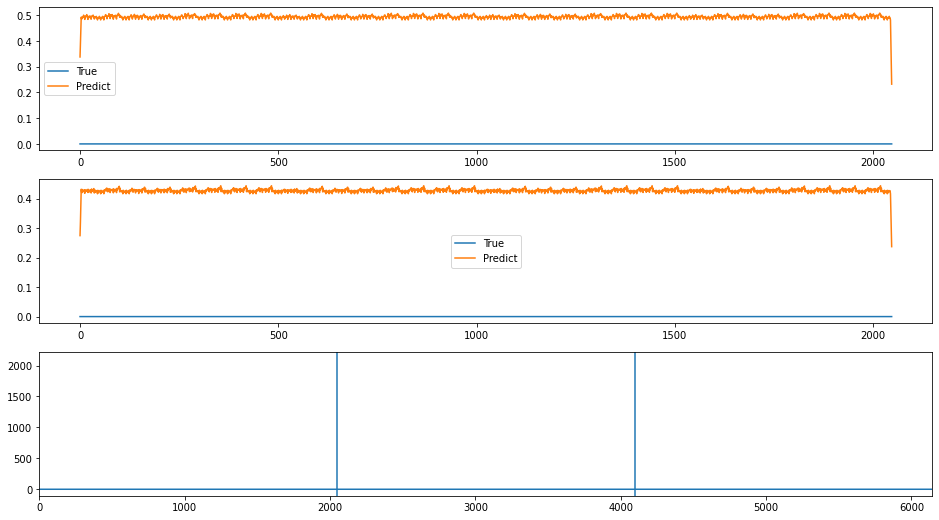

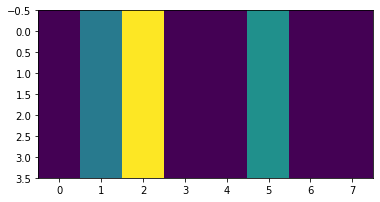

index: 140572
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7264
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-07 00:49:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...
n_bunches                                                     540
bunch_index                                                   577
bunch_number                                                  400
ts_length                                                   65536
chunk                                                          10
Name: 2657, dtype: object


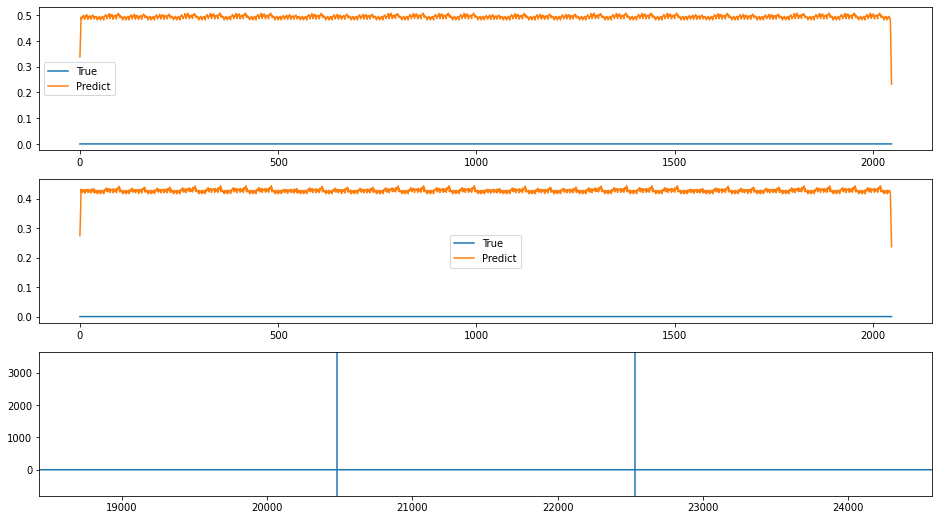

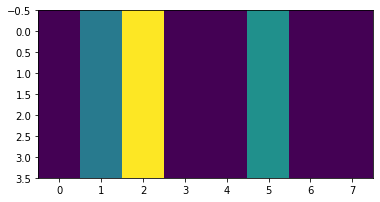

index: 108059
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7099
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-29 15:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7099/...
n_bunches                                                     396
bunch_index                                                   430
bunch_number                                                  298
ts_length                                                   65536
chunk                                                           3
Name: 942, dtype: object


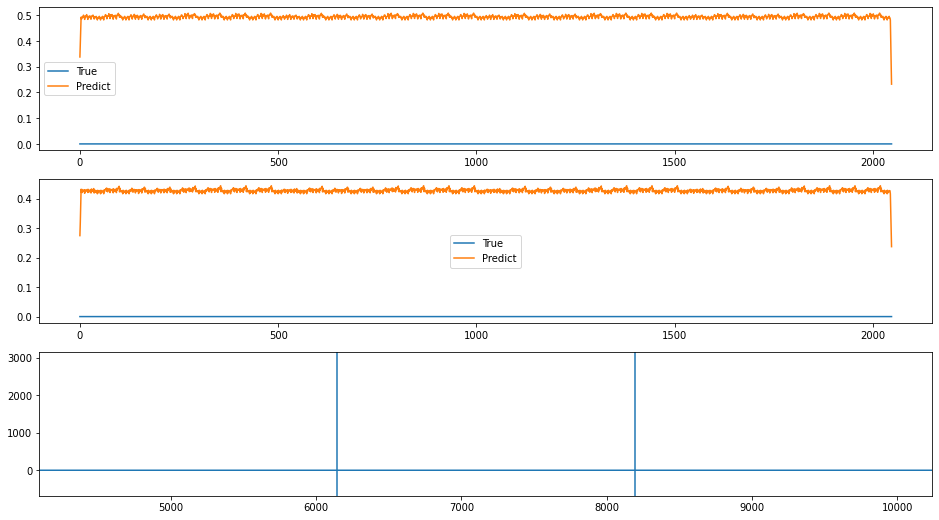

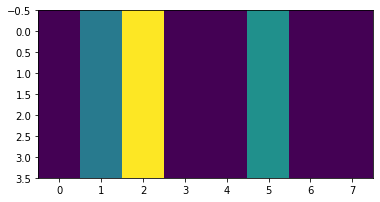

index: 216982
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7489
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-12-01 17:13:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7489/...
n_bunches                                                     271
bunch_index                                                  1173
bunch_number                                                  245
ts_length                                                   65536
chunk                                                           9
Name: 2438, dtype: object


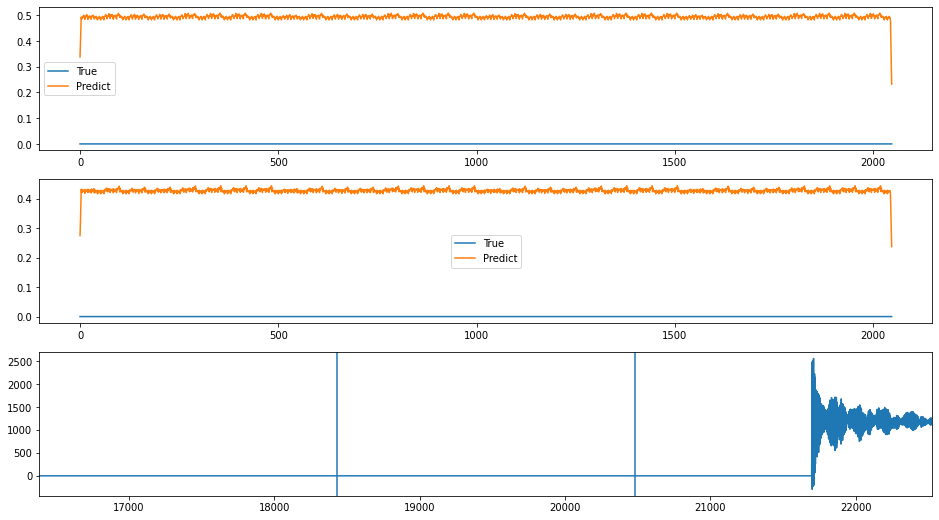

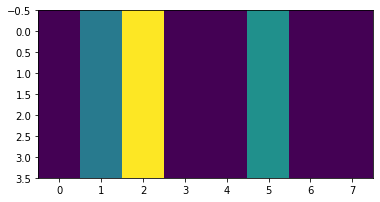

index: 374417
Error: 0.21328158151852664
type                                                         Inst
fill                                                         6215
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 23:32:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...
n_bunches                                                    1212
bunch_index                                                  1474
bunch_number                                                 1081
ts_length                                                   65536
chunk                                                           3
Name: 996, dtype: object


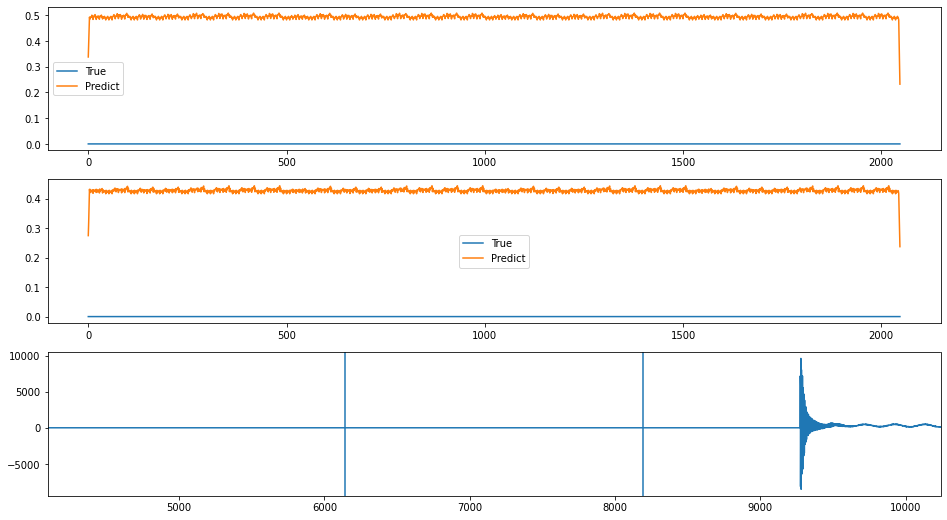

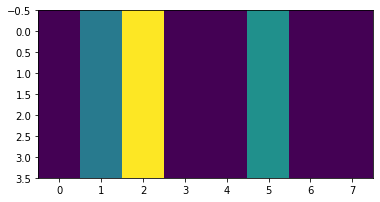

index: 276861
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 18:42:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     166
bunch_index                                                   673
bunch_number                                                  141
ts_length                                                   65536
chunk                                                           2
Name: 660, dtype: object


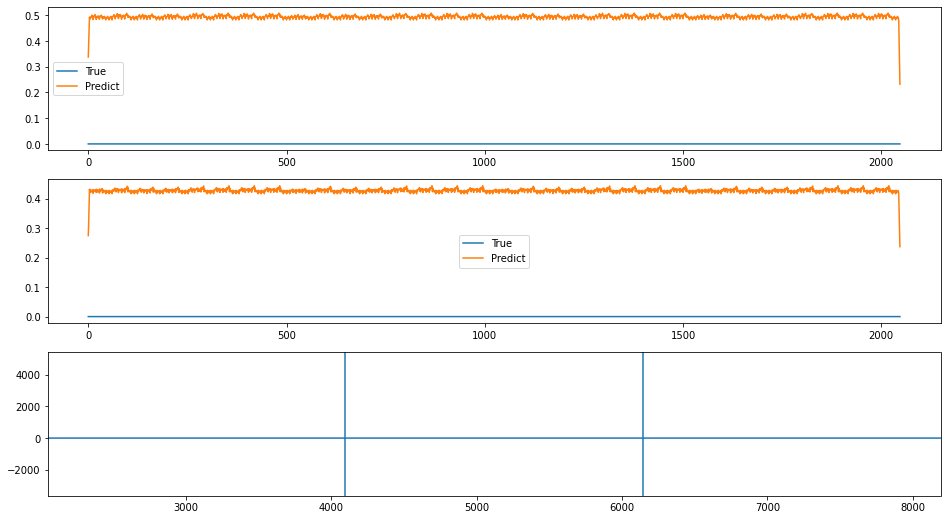

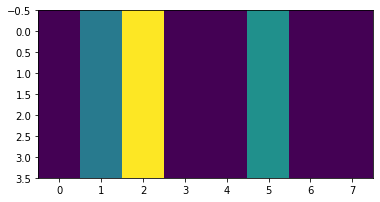

index: 374462
Error: 0.21328158151852664
type                                                         Inst
fill                                                         7405
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-05 01:57:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7405/...
n_bunches                                                      48
bunch_index                                                   967
bunch_number                                                   41
ts_length                                                   65536
chunk                                                           9
Name: 2364, dtype: object


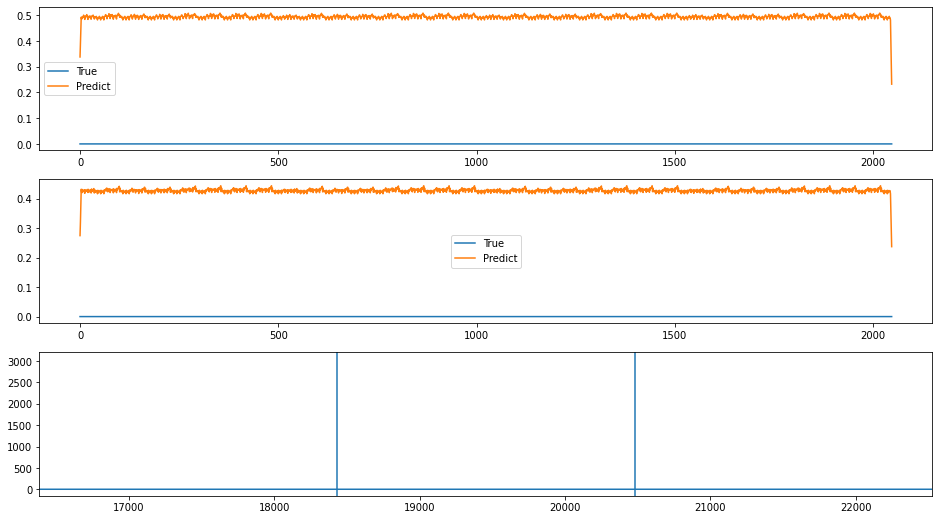

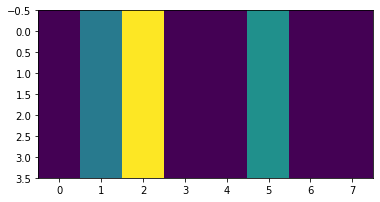

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 350053
Error: 0.05354353547214695
type                                                         Inst
fill                                                         7123
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-03 17:39:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7123/...
n_bunches                                                     780
bunch_index                                                   695
bunch_number                                                  504
ts_length                                                   65536
chunk                                                           5
Name: 1387, dtype: object


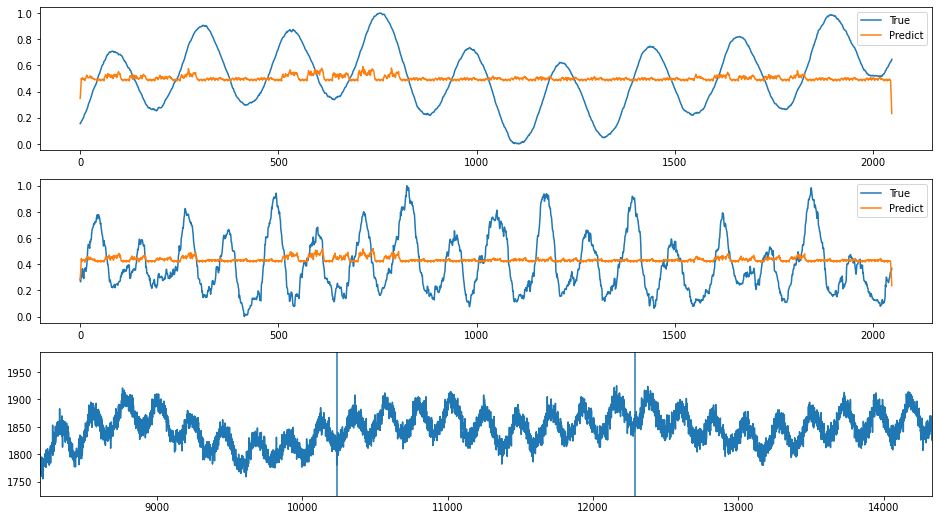

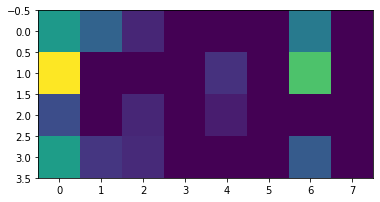

index: 242769
Error: 0.05354361590812892
type                                                         Inst
fill                                                         7378
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-28 22:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7378/...
n_bunches                                                     456
bunch_index                                                  1154
bunch_number                                                  226
ts_length                                                   65536
chunk                                                          21
Name: 5477, dtype: object


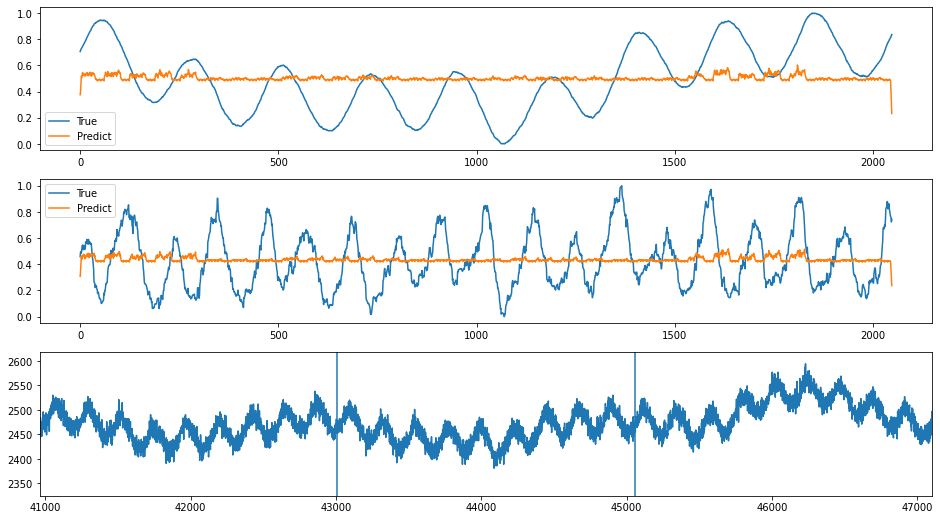

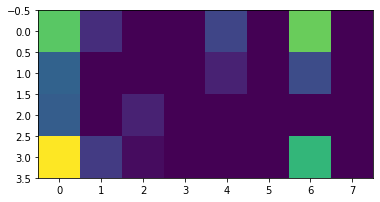

index: 117555
Error: 0.05354347397727743
type                                                         Inst
fill                                                         6348
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-30 21:15:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6348/...
n_bunches                                                    1868
bunch_index                                                  2456
bunch_number                                                 1326
ts_length                                                   65536
chunk                                                          13
Name: 3493, dtype: object


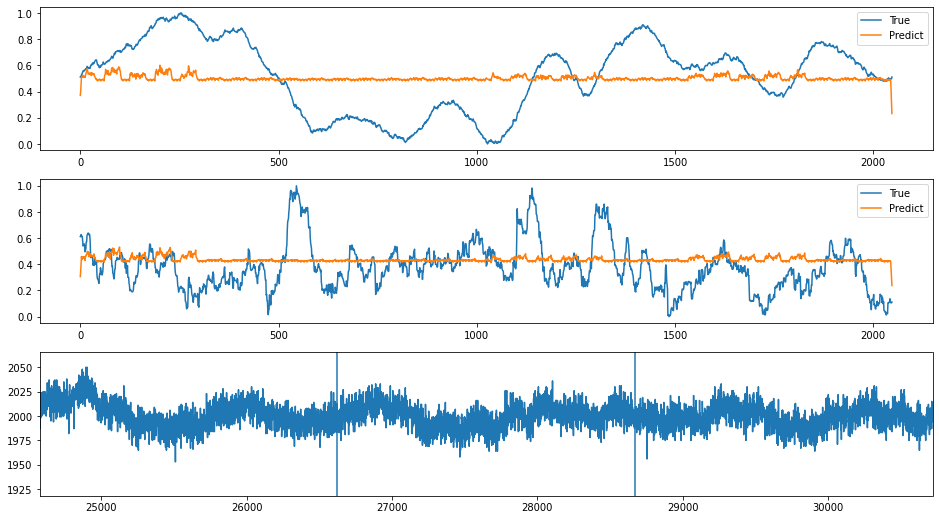

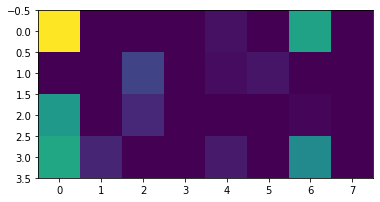

index: 45281
Error: 0.053543670209468305
type                                                         Inst
fill                                                         6961
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-22 19:31:30
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6961/...
n_bunches                                                    1068
bunch_index                                                   866
bunch_number                                                  633
ts_length                                                   65536
chunk                                                          26
Name: 6722, dtype: object


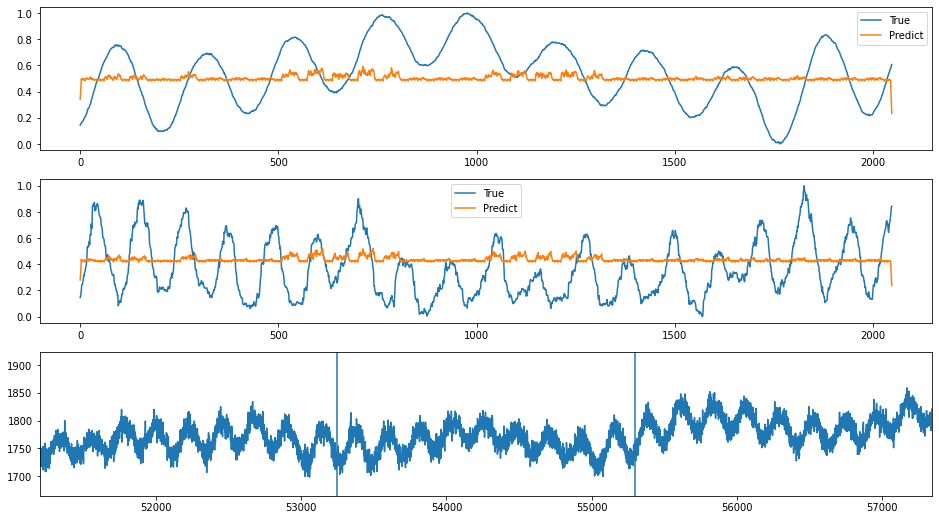

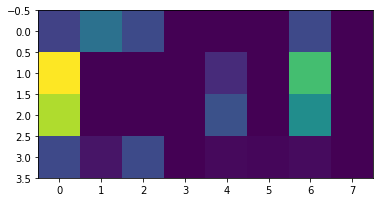

index: 125456
Error: 0.05354367068958314
type                                                         Inst
fill                                                         6690
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 05:04:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...
n_bunches                                                    1227
bunch_index                                                  1977
bunch_number                                                  691
ts_length                                                   65536
chunk                                                          21
Name: 5550, dtype: object


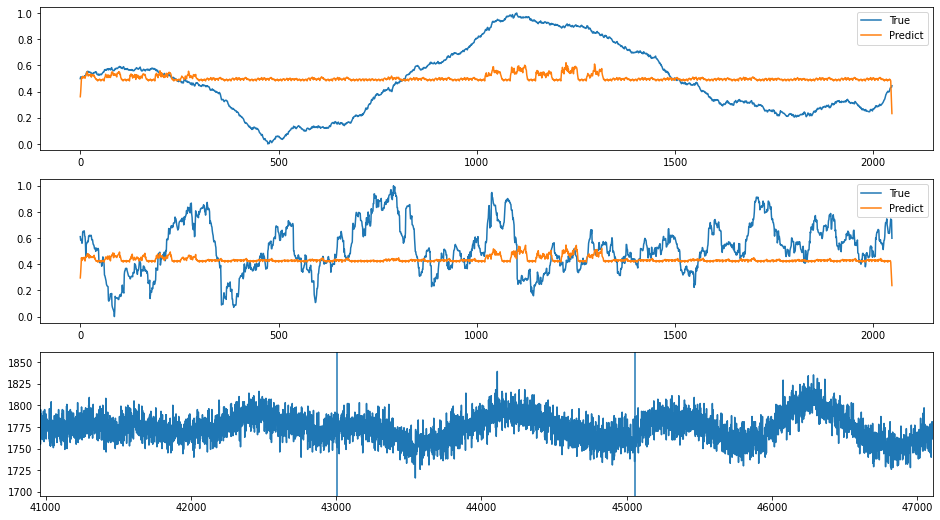

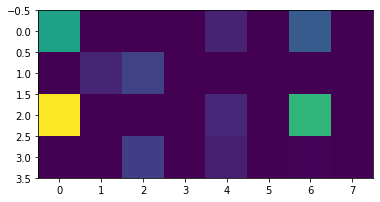

index: 176093
Error: 0.05354341588550526
type                                                         Inst
fill                                                         6692
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 17:53:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6692/...
n_bunches                                                     782
bunch_index                                                  1303
bunch_number                                                  635
ts_length                                                   65536
chunk                                                          25
Name: 6472, dtype: object


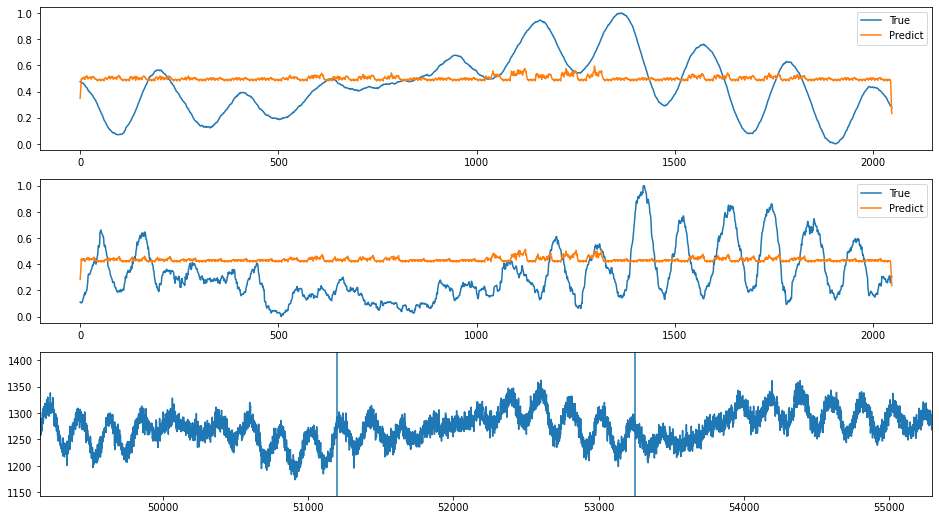

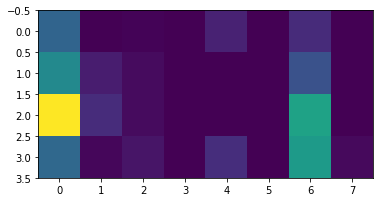

index: 93566
Error: 0.05354374762300698
type                                                         Inst
fill                                                         7047
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-12 15:34:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7047/...
n_bunches                                                     924
bunch_index                                                   469
bunch_number                                                  330
ts_length                                                   65536
chunk                                                           3
Name: 861, dtype: object


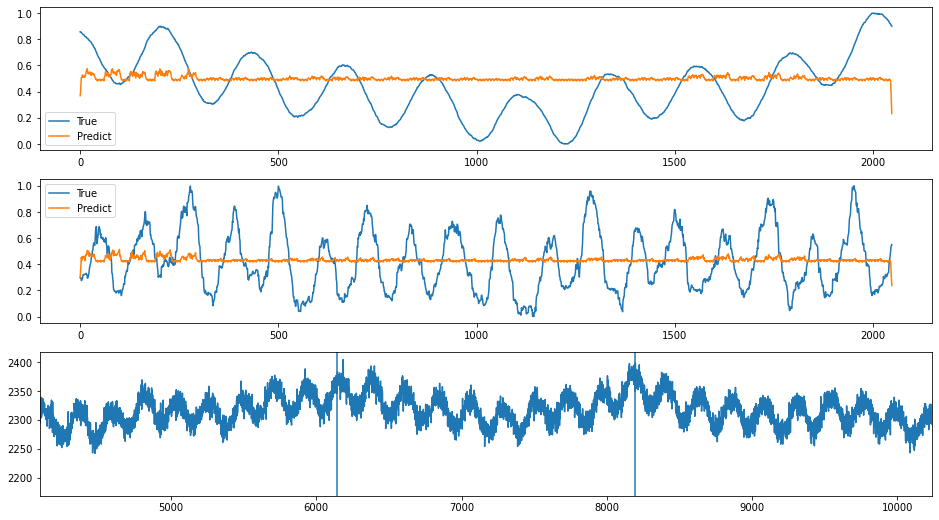

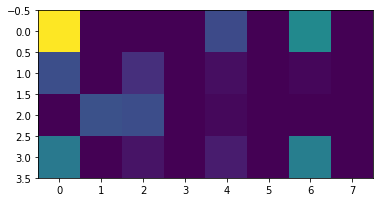

index: 128498
Error: 0.05354378431381449
type                                                         Inst
fill                                                         7042
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-10 16:09:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7042/...
n_bunches                                                     636
bunch_index                                                   236
bunch_number                                                  149
ts_length                                                   65536
chunk                                                          10
Name: 2560, dtype: object


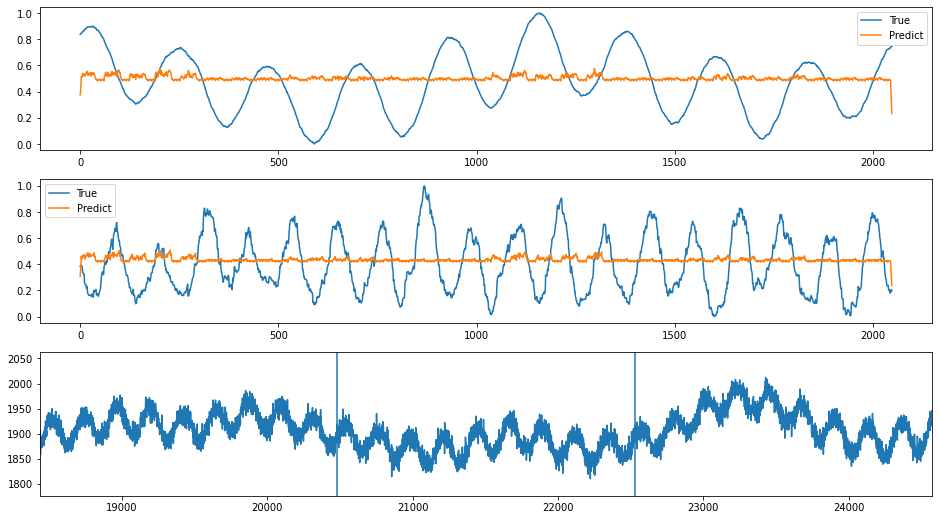

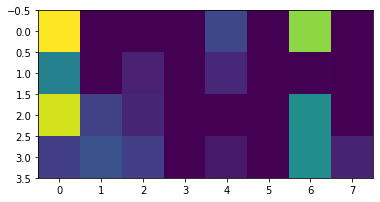

index: 56688
Error: 0.053543813055775775
type                                                         Inst
fill                                                         7384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 02:43:12
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7384/...
n_bunches                                                      12
bunch_index                                                    21
bunch_number                                                    3
ts_length                                                   65536
chunk                                                          12
Name: 3164, dtype: object


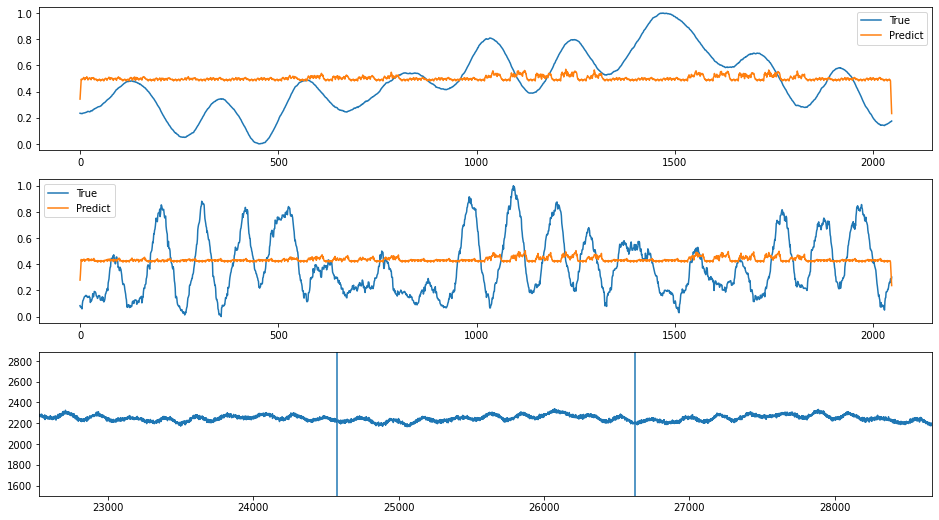

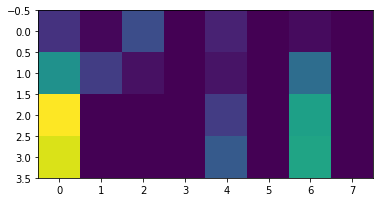

index: 17255
Error: 0.05354326887209003
type                                                         Inst
fill                                                         6694
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-17 09:55:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6694/...
n_bunches                                                    2175
bunch_index                                                  2821
bunch_number                                                 1808
ts_length                                                   65536
chunk                                                           7
Name: 1836, dtype: object


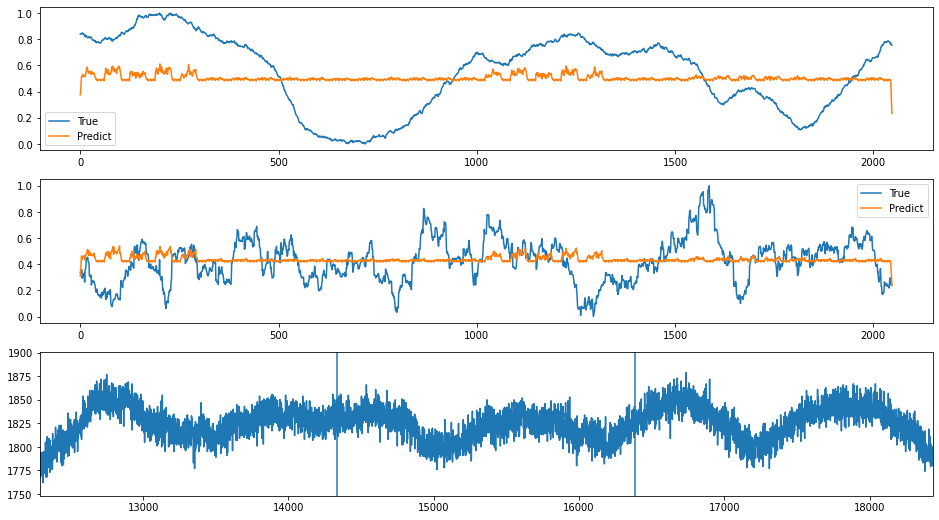

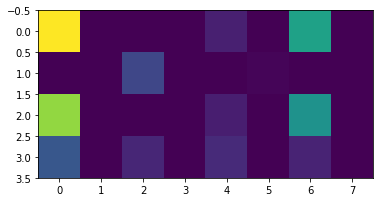

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 32)

In [34]:
print(encoded_2d[0])

[0.         0.02706166 0.06566025 0.         0.         0.03305528
 0.         0.         0.         0.02706166 0.06566025 0.
 0.         0.03305528 0.         0.         0.         0.02706166
 0.06566025 0.         0.         0.03305528 0.         0.
 0.         0.02706166 0.06566025 0.         0.         0.03305528
 0.         0.        ]


In [35]:
encoded_2d.min()

0.0

In [36]:
encoded_2d.max()

1.0480772

In [37]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [38]:
import sklearn
from sklearn.manifold import TSNE

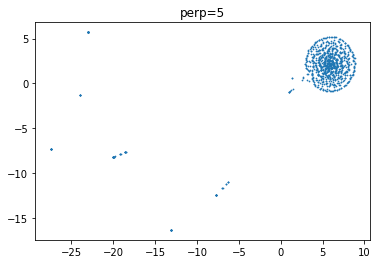

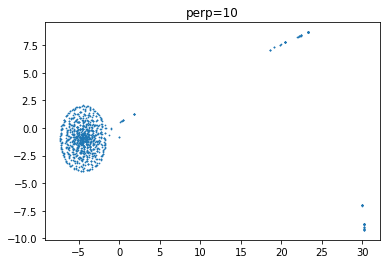

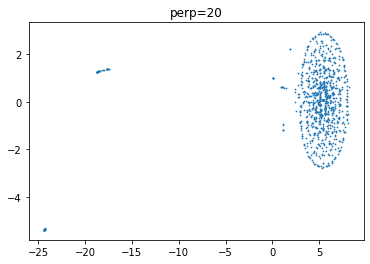

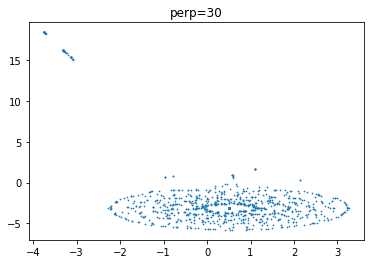

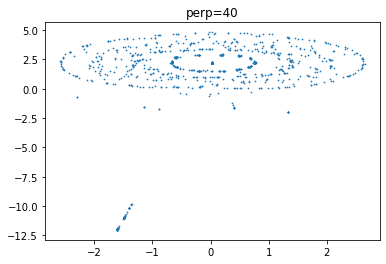

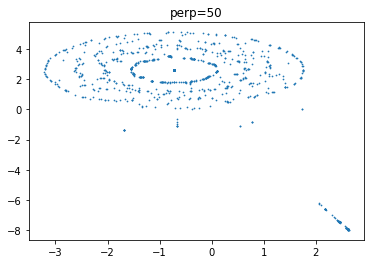

In [39]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [40]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

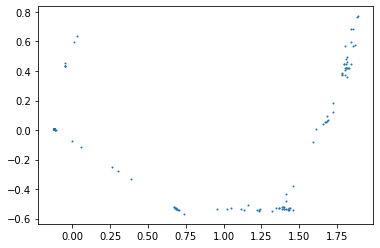

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [42]:
pca.explained_variance_ratio_.sum()

0.99789613

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

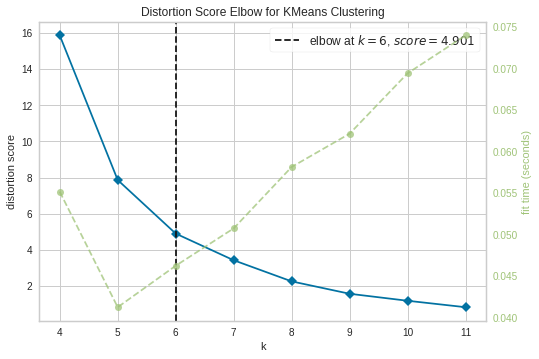

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(4, 12))
viz.fit(encoded_2d_pca)
viz.show()

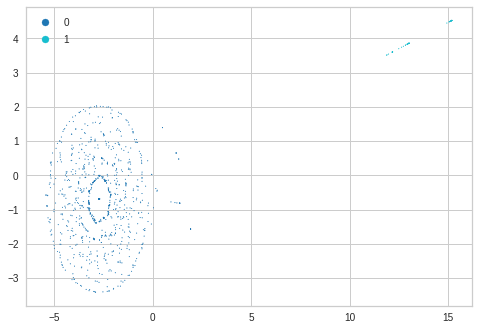

cluster 0
N samples: 944


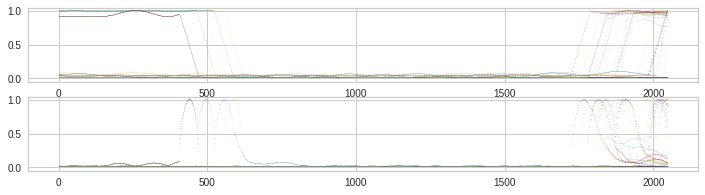

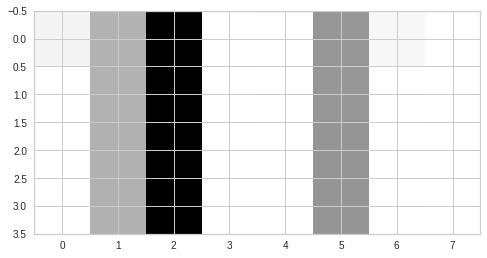

cluster 1
N samples: 80


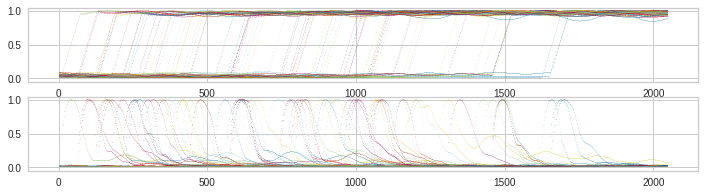

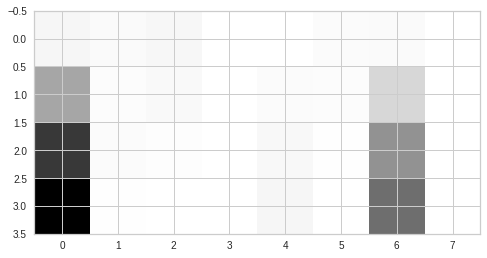

In [45]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()
    plot_avg_encoding(cluster_indices)
    plt.show()